In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler


## Dataframes

In [31]:
# Read Fer Dataset
emotion_fer = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_fer.csv")

# Read archieve Dataset
emotion_archieve = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_archieve.csv")

In [32]:
# Read CSV file for combine dataframe
emotion_csv = pd.concat([emotion_archieve, emotion_fer])

In [33]:
# Display first 5 rows of 3 dataframes
emotion_fer.head()

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger


In [34]:
emotion_archieve.head()

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger


In [35]:
emotion_csv.head()

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger


In [36]:
# Remove unnessacry columns
emotion_csv = emotion_csv.drop(columns=["frame","face_id", "timestamp", "success", "face"])
emotion_fer = emotion_fer.drop(columns=["frame","face_id", "timestamp", "success", "face"])
emotion_archieve = emotion_archieve.drop(columns=["frame","face_id", "timestamp", "success", "face"])

## Class Imbalance

In [37]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       31098
Neutral     18184
Sad         17554
Anger       15900
Surprise    14328
Fear        11350
Disgust      2726
Contempt      478
Name: Emotion Detected, dtype: int64

In [38]:
# Count the occurance of each emotion to see if bias can occur
emotion_archieve["Emotion Detected"].value_counts()

Happy       15549
Neutral      9092
Sad          8777
Anger        7950
Surprise     7164
Fear         5675
Disgust      1363
Contempt      239
Name: Emotion Detected, dtype: int64

In [39]:
# Count the occurance of each emotion to see if bias can occur
emotion_fer["Emotion Detected"].value_counts()

Happy       15549
Neutral      9092
Sad          8777
Anger        7950
Surprise     7164
Fear         5675
Disgust      1363
Contempt      239
Name: Emotion Detected, dtype: int64

In [40]:
# Plot the class imbalance
def plotimbalance(csvname, column, title):
    unique, counts = np.unique(csvname[column], return_counts=True)
    plt.bar(unique, counts)
    plt.xticks()
    plt.ylabel('Number of Samples')
    plt.xlabel('Emotion Detected')
    plt.title(title)
    plt.show()
    

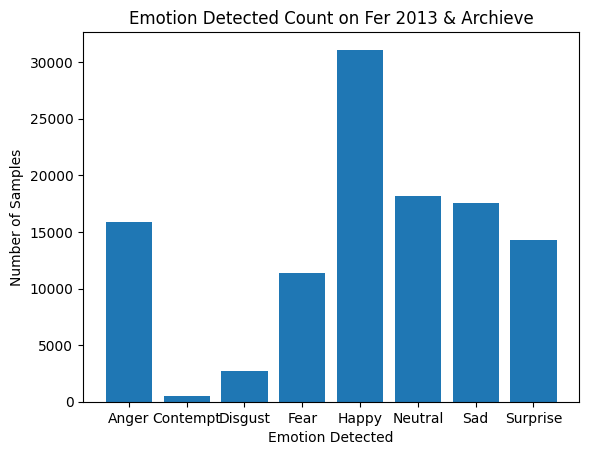

In [41]:
plotimbalance(emotion_csv, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Archieve")

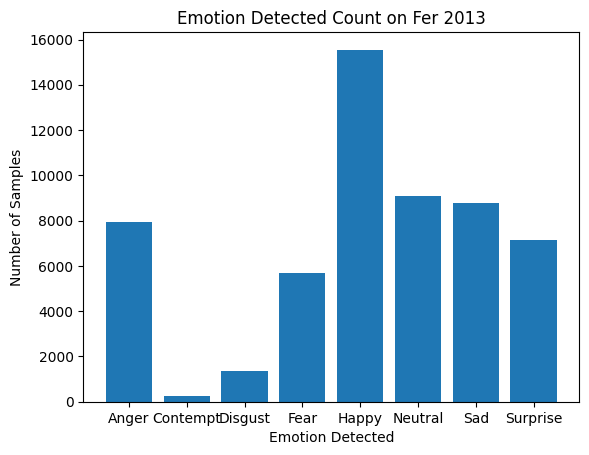

In [42]:
plotimbalance(emotion_fer, "Emotion Detected", "Emotion Detected Count on Fer 2013")

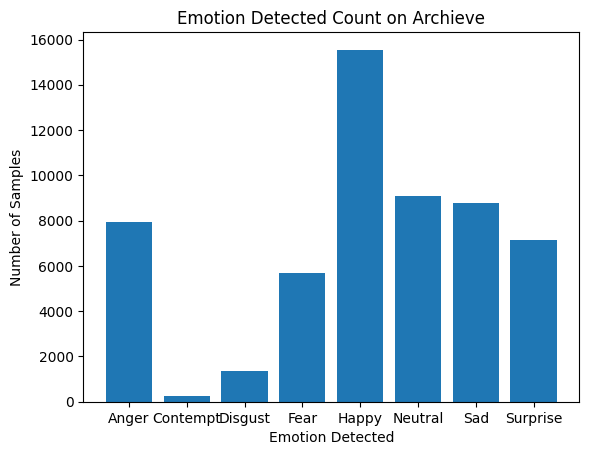

In [43]:
plotimbalance(emotion_archieve, "Emotion Detected", "Emotion Detected Count on Archieve")

In [44]:
# Replace each emotion with a number value
replace_list = {"Happy": 1, "Neutral": 2, "Sad":3 , "Anger": 4 , "Surprise": 5 , "Disgust":6 , "Contempt": 7, "Fear": 8}
emotion_csv = emotion_csv.replace(replace_list)
emotion_fer = emotion_fer.replace(replace_list)
emotion_archieve = emotion_archieve.replace(replace_list)

In [45]:
# Remove the emotions: Contempt and Disgust
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 7].index)
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 6].index)
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 2].index)

emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 7].index)
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 6].index)
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 2].index)

emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 7].index)
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 6].index)
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 2].index)


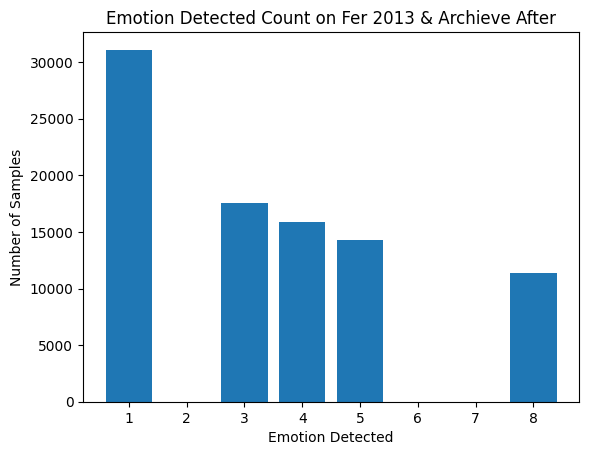

In [46]:
plotimbalance(emotion_csv, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Archieve After")

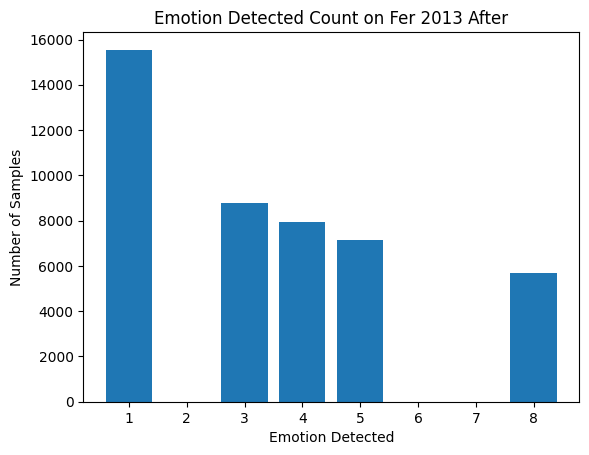

In [47]:
plotimbalance(emotion_fer, "Emotion Detected", "Emotion Detected Count on Fer 2013 After")

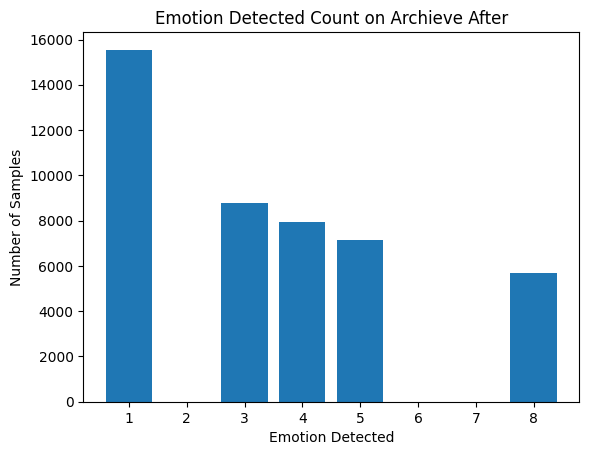

In [48]:
plotimbalance(emotion_archieve, "Emotion Detected", "Emotion Detected Count on Archieve After")

In [49]:
# Remove Anger and Fear emotions into emotion called negative 
emotion_fer_remove = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 4].index)
emotion_fer_remove = emotion_fer_remove.drop(emotion_fer_remove[emotion_fer_remove['Emotion Detected'] == 8].index)

## Feature Selections

In [50]:
# Intensity
intensity_columns = ['AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']

emotion_fer_i = emotion_fer[intensity_columns]
emotion_archieve_i = emotion_archieve[intensity_columns]
emotion_csv_i = emotion_csv[intensity_columns]

In [51]:
# Presence
presence_columns = ['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']

emotion_fer_p = emotion_fer[presence_columns]
emotion_archieve_p = emotion_archieve[presence_columns]
emotion_csv_p = emotion_csv[presence_columns]

In [52]:
# Intensity + Presence Combined
c = ['AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c', 
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r', 'Emotion Detected']

emotion_fer = emotion_fer[c]
emotion_fer_remove = emotion_fer_remove[c]
emotion_archieve = emotion_archieve[c]
emotion_csv = emotion_csv[c]

## Normilization

In [53]:
 # copy the data 
emotion_archieve_p_z = emotion_archieve_p.copy() 

emotion_archieve_p_z_x = emotion_archieve_p_z[['AU01_r',
    'AU02_r',
    'AU04_r',
    'AU05_r',
    'AU06_r',
    'AU07_r',
    'AU09_r',
    'AU10_r',
    'AU12_r',
    'AU14_r',
    'AU15_r',
    'AU17_r',
    'AU20_r',
    'AU23_r',
    'AU25_r',
    'AU26_r',
    'AU45_r']]
    
emotion_archieve_p_z_y = pd.DataFrame(emotion_archieve_p_z['Emotion Detected'])

# create a scaler object
std_scaler = StandardScaler()

emotion_archieve_p_z_x = pd.DataFrame(std_scaler.fit_transform(emotion_archieve_p_z_x), columns=emotion_archieve_p_z_x.columns)
    
emotion_archieve_p_z = pd.concat([emotion_archieve_p_z_x, emotion_archieve_p_z_y], axis=1, join='inner')

In [54]:
 # copy the data 
emotion_fer_p_z = emotion_fer_p.copy() 

emotion_fer_p_z_x = emotion_fer_p_z[['AU01_r',
    'AU02_r',
    'AU04_r',
    'AU05_r',
    'AU06_r',
    'AU07_r',
    'AU09_r',
    'AU10_r',
    'AU12_r',
    'AU14_r',
    'AU15_r',
    'AU17_r',
    'AU20_r',
    'AU23_r',
    'AU25_r',
    'AU26_r',
    'AU45_r']]
    
emotion_fer_p_z_y = pd.DataFrame(emotion_fer_p_z['Emotion Detected'])

# create a scaler object
std_scaler = StandardScaler()

emotion_fer_p_z_x = pd.DataFrame(std_scaler.fit_transform(emotion_fer_p_z_x), columns=emotion_fer_p_z_x.columns)
    
emotion_fer_p_z = pd.concat([emotion_fer_p_z_x, emotion_fer_p_z_y], axis=1, join='inner')

## Training & Testing 

In [55]:
 # Split the new dataframe into training and testing sets for all 3 dataframes
 
x_train_fer_i, x_test_fer_i, y_train_fer_i, y_test_fer_i = train_test_split(emotion_fer_i, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)

x_train_fer_p, x_test_fer_p, y_train_fer_p, y_test_fer_p = train_test_split(emotion_fer_p, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)

x_train_fer_ip, x_test_fer_ip, y_train_fer_ip, y_test_fer_ip = train_test_split(emotion_fer, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)

x_train_fer_ip_removal, x_test_fer_ip_removal, y_train_fer_ip_removal, y_test_fer_ip_removal = train_test_split(emotion_fer_remove, emotion_fer_remove["Emotion Detected"], test_size=0.33, random_state=42)


In [56]:
x_train_achieve_ip, x_test_archieve_ip, y_train_archieve_ip, y_test_archieve_ip = train_test_split(emotion_archieve, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

x_train_achieve_i, x_test_archieve_i, y_train_archieve_i, y_test_archieve_i = train_test_split(emotion_archieve_i, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

x_train_achieve_p, x_test_archieve_p, y_train_archieve_p, y_test_archieve_p = train_test_split(emotion_archieve_p, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

In [57]:
x_train_ip, x_test_ip, y_train_ip, y_test_ip = train_test_split(emotion_csv, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(emotion_csv_i, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(emotion_csv_p, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

In [58]:
x_train_archieve_z_p, x_test_archieve_z_p, y_train_archieve_z_p, y_test_archieve_z_p = train_test_split(emotion_archieve_p_z, 
                                                                                                       emotion_archieve_p_z["Emotion Detected"],
                                                                                                       test_size=0.33,
                                                                                                       random_state=42)

x_train_fer_z_p, x_test_fer_z_p, y_train_fer_z_p, y_test_fer_z_p = train_test_split(emotion_fer_p_z, 
                                                                                    emotion_fer_p_z["Emotion Detected"],
                                                                                    test_size=0.33,
                                                                                   random_state=42)

In [59]:
x_train_remove, x_test_remove, y_train_remove, y_test_remove = train_test_split(emotion_fer_remove, 
                                                                                    emotion_fer_remove["Emotion Detected"],
                                                                                    test_size=0.33,
                                                                                   random_state=42)

## Undersampling

In [60]:
# Undersample the emotion: Happy with Contempt and Disgust removed
def unsample(x, y, happyvalue):
    
    # 3b. Undersample emotion: Happy in the training dataset
    sampling_strategy = {1: happyvalue}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(x, y)
    
    # print(X_res["Emotion Detected"].value_counts()
    
    # Remove the Emotion Detected Column in the X_res
    X_res.drop(columns="Emotion Detected")
    
    return X_res, y_res

In [61]:
# Apply the undersample function
x_under_fer_p, y_under_fer_p = unsample(x_train_fer_p, y_train_fer_p, 6000)
x_under_fer_i, y_under_fer_i = unsample(x_train_fer_i, y_train_fer_i,6000 )
x_under_fer_i_p, y_under_fer_i_p = unsample(x_train_fer_ip, y_train_fer_ip,6000 )
x_under_fer_i_p_removal, y_under_fer_i_p_removal = unsample(x_train_fer_ip_removal, y_train_fer_ip_removal ,6000 )

x_under_archieve_p, y_under_archieve_p = unsample(x_train_achieve_p, y_train_archieve_p, 6000 )
x_under_archieve_i, y_under_archieve_i = unsample(x_train_achieve_i, y_train_archieve_i, 6000)
x_under_archieve_i_p, y_under_archieve_i_p = unsample(x_train_achieve_ip, y_train_archieve_ip, 6000)

x_under_p, y_under_p = unsample(x_train_p, y_train_p, 15000)
x_under_i, y_under_i = unsample(x_train_i, y_train_i,15000 )
x_under_ip, y_under_ip = unsample(x_train_ip, y_train_ip, 15000 )

x_under_fer_p_z, y_under_fer_p_z = unsample(x_train_fer_z_p, y_train_fer_z_p, 6000)

x_under_archieve_p_z, y_under_archieve_p_z = unsample(x_train_archieve_z_p, y_train_archieve_z_p, 6000 )

In [62]:
# Drop Emotion Detected: x-training
x_under_fer_p = x_under_fer_p.drop(columns='Emotion Detected')
x_under_fer_i = x_under_fer_i.drop(columns='Emotion Detected')
x_under_fer_i_p = x_under_fer_i_p.drop(columns='Emotion Detected')

x_under_archieve_p = x_under_archieve_p.drop(columns='Emotion Detected')
x_under_archieve_i = x_under_archieve_i.drop(columns='Emotion Detected')
x_under_archieve_i_p = x_under_archieve_i_p.drop(columns='Emotion Detected')

x_under_p = x_under_p.drop(columns='Emotion Detected')
x_under_i = x_under_i.drop(columns='Emotion Detected')
x_under_ip = x_under_ip.drop(columns='Emotion Detected')

x_under_fer_p_z = x_under_fer_p_z.drop(columns='Emotion Detected')
x_under_archieve_p_z = x_under_archieve_p_z.drop(columns='Emotion Detected')

In [63]:
# Drop Emotion Detected: x-testing
x_test_fer_i = x_test_fer_i.drop(columns='Emotion Detected')
x_test_fer_p = x_test_fer_p.drop(columns='Emotion Detected')
x_test_fer_ip = x_test_fer_ip.drop(columns='Emotion Detected')

x_test_archieve_i = x_test_archieve_i.drop(columns='Emotion Detected')
x_test_archieve_p = x_test_archieve_p.drop(columns='Emotion Detected')
x_test_archieve_ip = x_test_archieve_ip.drop(columns='Emotion Detected')

x_test_i = x_test_i.drop(columns='Emotion Detected')
x_test_p = x_test_p.drop(columns='Emotion Detected')
x_test_ip = x_test_ip.drop(columns='Emotion Detected')

x_test_archieve_z_p = x_test_archieve_z_p.drop(columns='Emotion Detected')
x_test_fer_z_p = x_test_fer_z_p.drop(columns='Emotion Detected')


In [64]:
# Replace each emotion with a number value
replace_list = {1:"Happy", 3: "Sad" , 4: "Anger" , 5: "Surprise" , 6: "Disgust" , 7: "Contempt", 8:"Fear"}

y_under_p = y_under_p.replace(replace_list)
y_under_i = y_under_i.replace(replace_list)
y_under_ip = y_under_ip.replace(replace_list)

y_under_archieve_i = y_under_archieve_i.replace(replace_list)
y_under_archieve_p = y_under_archieve_p.replace(replace_list)
y_under_archieve_i_p = y_under_archieve_i_p.replace(replace_list)

y_under_fer_i = y_under_fer_i.replace(replace_list)
y_under_fer_p = y_under_fer_p.replace(replace_list)
y_under_fer_i_p = y_under_fer_i_p.replace(replace_list)

y_under_fer_p_z = y_under_fer_p_z.replace(replace_list)
y_under_archieve_p_z = y_under_archieve_p_z.replace(replace_list)


y_test_archieve_i = y_test_archieve_i.replace(replace_list)
y_test_archieve_p = y_test_archieve_p.replace(replace_list)
y_test_archieve_ip = y_test_archieve_ip.replace(replace_list)

y_test_fer_i = y_test_fer_i.replace(replace_list)
y_test_fer_p = y_test_fer_p.replace(replace_list)
y_test_fer_ip = y_test_fer_ip.replace(replace_list)

y_test_i = y_test_i.replace(replace_list)
y_test_p = y_test_p.replace(replace_list)
y_test_ip = y_test_ip.replace(replace_list)

y_test_fer_z_p = y_test_fer_z_p.replace(replace_list)
y_test_archieve_z_p = y_test_archieve_z_p.replace(replace_list)

## Models

### SVM RBF

In [65]:
svm_rbf = svm.SVC(kernel="rbf",
                  C = 10,
                  gamma = 0.1)

In [66]:
# Fer Dataset 

svm_rbf_fer_p = svm_rbf.fit(x_under_fer_p, y_under_fer_p)
svm_y_fer_p = svm_rbf_fer_p.predict(x_test_fer_p)

svm_rbf_fer_i = svm_rbf.fit(x_under_fer_i, y_under_fer_i)
svm_y_fer_i = svm_rbf_fer_i.predict(x_test_fer_i)

svm_rbf_fer_ip = svm_rbf.fit(x_under_fer_i_p, y_under_fer_i_p)
svm_y_fer_ip = svm_rbf_fer_ip.predict(x_test_fer_ip)

svm = svm_rbf.fit(x_under_fer_i_p_removal, y_under_fer_i_p_removal)
svm_y_fer_ip_removal = svm.predict(x_test_fer_ip_removal)

In [67]:
# Archieve Dataset
svm_rbf_archieve_p = svm_rbf.fit(x_under_archieve_p, y_under_archieve_p)
svm_y_archieve_p = svm_rbf_archieve_p.predict(x_test_archieve_p)

svm_rbf_archieve_i = svm_rbf.fit(x_under_archieve_i, y_under_archieve_i)
svm_y_archieve_i = svm_rbf_archieve_i.predict(x_test_archieve_i)

svm_rbf_archieve_ip = svm_rbf.fit(x_under_archieve_i_p, y_under_archieve_i_p)
svm_y_archieve_ip = svm_rbf_archieve_ip.predict(x_test_archieve_ip)

In [68]:
# Both
svm_rbf_p = svm_rbf.fit(x_under_p, y_under_p)
svm_y_p = svm_rbf_p.predict(x_test_p)

svm_rbf_i = svm_rbf.fit(x_under_fer_i, y_under_fer_i)
svm_y_i = svm_rbf_fer_i.predict(x_test_fer_i)

svm_rbf_ip = svm_rbf.fit(x_under_ip, y_under_ip)
svm_y_ip = svm_rbf_ip.predict(x_test_ip)

In [69]:
# Z-Normilization 
svm_rbf_p_z = svm_rbf.fit(x_under_fer_p_z, y_under_fer_p_z)
svm_y_p_fer_z = svm_rbf_p_z.predict(x_test_fer_z_p)

svm_rbf_p_z_a = svm_rbf.fit(x_under_archieve_p_z, y_under_archieve_p_z)
svm_y_p_archieve_z = svm_rbf_p_z_a.predict(x_test_archieve_z_p)

### SVM Linear

In [70]:
svm_linear = LinearSVC(C = 10)

In [71]:
# Fer Dataset 
s1 = svm_linear.fit(x_under_fer_p, y_under_fer_p)
svm_linear_y_fer_p = s1.predict(x_test_fer_p)

s2 = svm_linear.fit(x_under_fer_i, y_under_fer_i)
svm_linear_y_fer_i = s2.predict(x_test_fer_i)

s3 = svm_linear.fit(x_under_fer_i_p, y_under_fer_i_p)
svm_linear_y_fer_ip = s3.predict(x_test_fer_ip)

s4 = svm_linear.fit(x_under_fer_i_p_removal, y_under_fer_i_p_removal)
svm_linear_y_fer_ip_removal = s4.predict(x_test_fer_ip_removal)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
# Archieve Dataset
s5 = svm_linear.fit(x_under_archieve_p, y_under_archieve_p)
svm_linear_y_archieve_p = s5.predict(x_test_archieve_p)

s6 = svm_linear.fit(x_under_archieve_i, y_under_archieve_i)
svm_linear_y_archieve_i = s6.predict(x_test_archieve_i)

s7 = svm_linear.fit(x_under_archieve_i_p, y_under_archieve_i_p)
svm_linear_y_archieve_ip = s7.predict(x_test_archieve_ip)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [73]:
# Both
s8 = svm_linear.fit(x_under_p, y_under_p)
svm_y_l_p = s8.predict(x_test_p)

s9 = svm_linear.fit(x_under_fer_i, y_under_fer_i)
svm_y_l_i = s9.predict(x_test_fer_i)

s10 = svm_linear.fit(x_under_ip, y_under_ip)
svm_y_linear_ip = s10.predict(x_test_ip)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
# Z-Normilization 
s11 = svm_linear.fit(x_under_fer_p_z, y_under_fer_p_z)
svm_y_p_fer_linear_z = s11.predict(x_test_fer_z_p)

s12 = svm_linear.fit(x_under_archieve_p_z, y_under_archieve_p_z)
svm_y_p_archieve_linear_z = s12.predict(x_test_archieve_z_p)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest

In [75]:
# Random Forest Model with the best parameters
rf = RandomForestClassifier(max_features= 'sqrt', 
                            min_samples_leaf= 75,
                            n_estimators= 100)

In [76]:
rf_fer_p = rf.fit(x_under_fer_p, y_under_fer_p)
rf_fer_y_p = rf_fer_p.predict(x_test_fer_p)

rf_fer_i = rf.fit(x_under_fer_i, y_under_fer_i)
rf_fer_y_i = rf_fer_i.predict(x_test_fer_i)

rf_fer_ip = rf.fit(x_under_fer_i_p, y_under_fer_i_p)
rf_fer_y_ip = rf_fer_ip.predict(x_test_fer_ip)

In [77]:
# Archieve Dataset
rf_archieve_p = rf.fit(x_under_archieve_p, y_under_archieve_p)
rf_archieve_p_y = rf_archieve_p.predict(x_test_archieve_p)

rf_archieve_i = rf.fit(x_under_archieve_i, y_under_archieve_i)
rf_archieve_i_y = rf_archieve_i.predict(x_test_archieve_i)

rf_archieve_ip = rf.fit(x_under_archieve_i_p, y_under_archieve_i_p)
rf_archieve_ip_y = rf_archieve_ip.predict(x_test_archieve_ip)

In [78]:
# Both
rf_p = rf.fit(x_under_p, y_under_p)
rf_y_p = rf_p.predict(x_test_p)

rf_i = rf.fit(x_under_fer_i, y_under_fer_i)
rf_i_y = rf_i.predict(x_test_fer_i)

rf_ip = rf.fit(x_under_ip, y_under_ip)
rf_ip_y = rf_ip.predict(x_test_ip)

In [79]:
# Z-Normilization 
rf_f_p_z = rf.fit(x_under_fer_p_z, y_under_fer_p_z)
rf_fer_p_z = rf_f_p_z.predict(x_test_fer_z_p)

rf_a_p_z = rf.fit(x_under_archieve_p_z, y_under_archieve_p_z)
rf_a_p_z = rf_a_p_z.predict(x_test_archieve_z_p)

### Naive Bayes: Contempt

In [80]:
# Complement NB
cnb = ComplementNB(alpha=1)

In [81]:
# Fer Dataset 

cnb_fer_p = cnb.fit(x_under_fer_p, y_under_fer_p)
cnb_fer_p_y = cnb_fer_p.predict(x_test_fer_p)

cnb_fer_i = cnb.fit(x_under_fer_i, y_under_fer_i)
cnb_fer_i_y = cnb_fer_i.predict(x_test_fer_i)

cnb_fer_ip = cnb.fit(x_under_fer_i_p, y_under_fer_i_p)
cnb_fer_ip_y = cnb_fer_ip.predict(x_test_fer_ip)

In [82]:
# Archieve Dataset
cnb_archieve_p = cnb.fit(x_under_archieve_p, y_under_archieve_p)
cnb_archieve_p_y = cnb_archieve_p.predict(x_test_archieve_p)

cnb_archieve_i = cnb.fit(x_under_archieve_i, y_under_archieve_i)
cnb_archieve_i_y = cnb_archieve_i.predict(x_test_archieve_i)

cnb_archieve_ip = cnb.fit(x_under_archieve_i_p, y_under_archieve_i_p)
cnb_archieve_ip_y = cnb_archieve_ip.predict(x_test_archieve_ip)

In [83]:
# Both
cnb_p = cnb.fit(x_under_p, y_under_p)
cnb_p_y = cnb_p.predict(x_test_p)

cnb_i = cnb.fit(x_under_fer_i, y_under_fer_i)
cnb_i_y = cnb_i.predict(x_test_fer_i)

cnb_ip = cnb.fit(x_under_ip, y_under_ip)
cnb_ip_y = cnb_ip.predict(x_test_ip)

### Naive Bayes: Guasssin

In [84]:
# Gaussian NB
gnd = GaussianNB()

In [85]:
# Fer Dataset 

gnd_fer_p = gnd.fit(x_under_fer_p, y_under_fer_p)
gnd_fer_p_y = gnd_fer_p.predict(x_test_fer_p)

gnd_fer_i = gnd.fit(x_under_fer_i, y_under_fer_i)
gnd_fer_i_y = gnd_fer_i.predict(x_test_fer_i)

gnd_fer_ip = gnd.fit(x_under_fer_i_p, y_under_fer_i_p)
gnd_fer_ip_y = gnd_fer_ip.predict(x_test_fer_ip)

In [86]:
# Archieve Dataset
gnd_archieve_p = gnd.fit(x_under_archieve_p, y_under_archieve_p)
gnd_archieve_p_y = gnd_archieve_p.predict(x_test_archieve_p)

gnd_archieve_i = gnd.fit(x_under_archieve_i, y_under_archieve_i)
gnd_archieve_i_y = gnd_archieve_i.predict(x_test_archieve_i)

gnd_archieve_ip = gnd.fit(x_under_archieve_i_p, y_under_archieve_i_p)
gnd_archieve_ip_y = gnd_archieve_ip.predict(x_test_archieve_ip)

In [87]:
# Both
gnd_p = gnd.fit(x_under_p, y_under_p)
gnd_p_y = gnd_p.predict(x_test_p)

gnd_i = gnd.fit(x_under_fer_i, y_under_fer_i)
gnd_i_y = gnd_i.predict(x_test_fer_i)

gnd_ip = gnd.fit(x_under_ip, y_under_ip)
gnd_ip_y = gnd_ip.predict(x_test_ip)

In [88]:
# Z-Normilization 
gnd_f_p_z = gnd.fit(x_under_fer_p_z, y_under_fer_p_z)
gnd_fer_p_z = gnd_f_p_z.predict(x_test_fer_z_p)

gnd_a_p_z = gnd.fit(x_under_archieve_p_z, y_under_archieve_p_z)
gnd_a_p_z = gnd_a_p_z.predict(x_test_archieve_z_p)

### Decision Tree

In [89]:
# Decision Tree Model
tree = DecisionTreeClassifier(splitter="best",
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)

In [90]:
# Fer Dataset 

tree_fer_p = tree.fit(x_under_fer_p, y_under_fer_p)
tree_fer_p_y = tree_fer_p.predict(x_test_fer_p)

tree_fer_i = tree.fit(x_under_fer_i, y_under_fer_i)
tree_fer_i_y = tree_fer_i.predict(x_test_fer_i)

tree_fer_ip = tree.fit(x_under_fer_i_p, y_under_fer_i_p)
tree_fer_ip_y = tree_fer_ip.predict(x_test_fer_ip)

In [91]:
# Archieve Dataset
tree_archieve_p = tree.fit(x_under_archieve_p, y_under_archieve_p)
tree_archieve_p_y = tree_archieve_p.predict(x_test_archieve_p)

tree_archieve_i = tree.fit(x_under_archieve_i, y_under_archieve_i)
tree_archieve_i_y = tree_archieve_i.predict(x_test_archieve_i)

tree_archieve_ip = tree.fit(x_under_archieve_i_p, y_under_archieve_i_p)
tree_archieve_ip_y = tree_archieve_ip.predict(x_test_archieve_ip)

In [92]:
# Both
tree_p = tree.fit(x_under_p, y_under_p)
tree_p_y = tree_p.predict(x_test_p)

tree_i = tree.fit(x_under_fer_i, y_under_fer_i)
tree_i_y = tree_i.predict(x_test_fer_i)

tree_ip = tree.fit(x_under_ip, y_under_ip)
tree_ip_y = tree_ip.predict(x_test_ip)

In [93]:
# Z-Normilization 
tree_f_p_z = tree.fit(x_under_fer_p_z, y_under_fer_p_z)
tree_fer_p_z = tree_f_p_z.predict(x_test_fer_z_p)

tree_a_p_z = tree.fit(x_under_archieve_p_z, y_under_archieve_p_z)
tree_a_p_z = tree_a_p_z.predict(x_test_archieve_z_p)

## Reports

In [94]:
def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    #F1 Score
    print("F1 Score")
    print(f1_score(y_label_training, y_label_prediction, average='macro'))
    
    # Classification Report
    print("Classification Report")
    print(classification_report(y_label_training, y_label_prediction))

In [95]:
def CMplot(title, testing, svm_training, svm_linear,
           rf_training,
           con_training,
           gu_training,
           tree_training):
    
    # Create subplots for given confusion matrices
    f, axes = plt.subplots(2, 3, figsize=(20, 20))
    
    f.suptitle(title)
    
    # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, svm_training)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0, 0])
    axes[0][0].set_title("SVM RBF")
    
    cm = confusion_matrix(testing, svm_linear)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0, 1])
    axes[0][1].set_title("SVM Linear")
    
    # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, rf_training)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0, 2])
    axes[0][2].set_title("Random Forest")
    
    # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, con_training)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[1, 0])
    axes[1][0].set_title("Naive Bayes Contempt")
    
     # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, gu_training)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[1, 1])
    axes[1][1].set_title("Naive Bayes Guassin")

     # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, tree_training)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[1, 2])
    axes[1][2].set_title("Decision Tree")

### Fer 2013 Presence
- Best Performance: SVM Model
- Worst Performance: Naive Bayes CNB

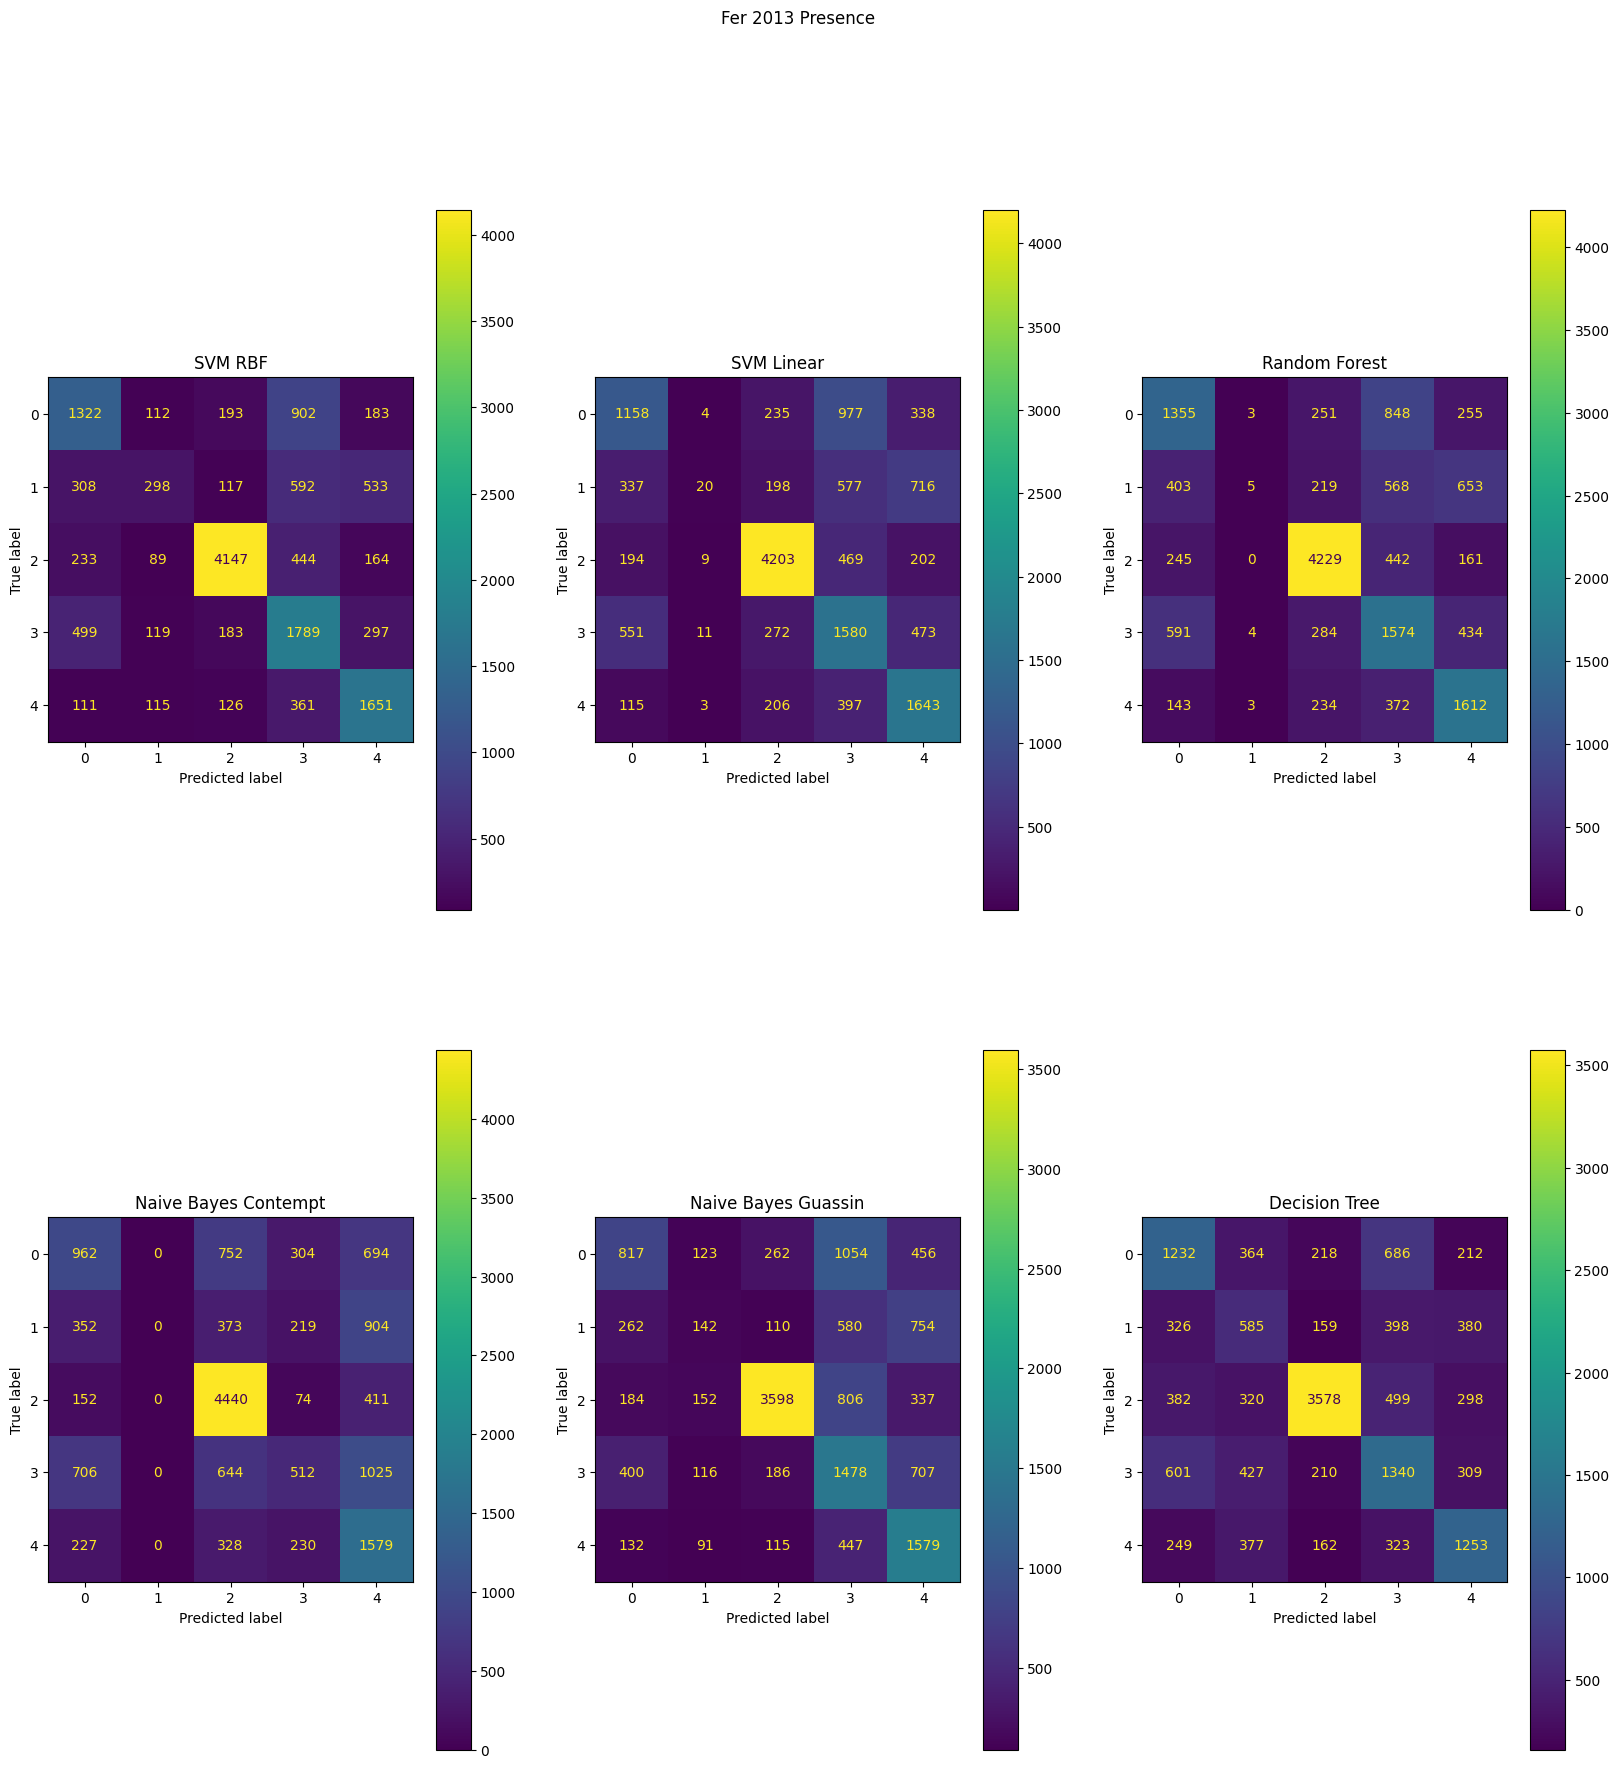

In [96]:
CMplot("Fer 2013 Presence", y_test_fer_p, svm_y_fer_p, svm_linear_y_fer_p,
       rf_fer_y_p, cnb_fer_p_y, gnd_fer_p_y, tree_fer_p_y)

In [97]:
metics_reports(y_test_fer_p, svm_y_fer_p)

Accurary Score
0.6184175174637292
F1 Score
0.5464866729533447
Classification Report
              precision    recall  f1-score   support

       Anger       0.53      0.49      0.51      2712
        Fear       0.41      0.16      0.23      1848
       Happy       0.87      0.82      0.84      5077
         Sad       0.44      0.62      0.51      2887
    Surprise       0.58      0.70      0.64      2364

    accuracy                           0.62     14888
   macro avg       0.57      0.56      0.55     14888
weighted avg       0.62      0.62      0.61     14888



In [98]:
metics_reports(y_test_fer_p, svm_linear_y_fer_p)

Accurary Score
0.5779150994089199
F1 Score
0.4669474786294767
Classification Report
              precision    recall  f1-score   support

       Anger       0.49      0.43      0.46      2712
        Fear       0.43      0.01      0.02      1848
       Happy       0.82      0.83      0.82      5077
         Sad       0.40      0.55      0.46      2887
    Surprise       0.49      0.70      0.57      2364

    accuracy                           0.58     14888
   macro avg       0.52      0.50      0.47     14888
weighted avg       0.58      0.58      0.55     14888



In [99]:
metics_reports(y_test_fer_p, rf_fer_y_p)

Accurary Score
0.5894008597528211
F1 Score
0.47665232141867986
Classification Report
              precision    recall  f1-score   support

       Anger       0.50      0.50      0.50      2712
        Fear       0.33      0.00      0.01      1848
       Happy       0.81      0.83      0.82      5077
         Sad       0.41      0.55      0.47      2887
    Surprise       0.52      0.68      0.59      2364

    accuracy                           0.59     14888
   macro avg       0.51      0.51      0.48     14888
weighted avg       0.57      0.59      0.56     14888



In [100]:
metics_reports(y_test_fer_p, cnb_fer_p_y)

Accurary Score
0.5032912412681354
F1 Score
0.36719540077834967
Classification Report
              precision    recall  f1-score   support

       Anger       0.40      0.35      0.38      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.68      0.87      0.76      5077
         Sad       0.38      0.18      0.24      2887
    Surprise       0.34      0.67      0.45      2364

    accuracy                           0.50     14888
   macro avg       0.36      0.41      0.37     14888
weighted avg       0.43      0.50      0.45     14888



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [101]:
metics_reports(y_test_fer_p, gnd_fer_p_y)

Accurary Score
0.5114185921547555
F1 Score
0.4328874646242567
Classification Report
              precision    recall  f1-score   support

       Anger       0.46      0.30      0.36      2712
        Fear       0.23      0.08      0.11      1848
       Happy       0.84      0.71      0.77      5077
         Sad       0.34      0.51      0.41      2887
    Surprise       0.41      0.67      0.51      2364

    accuracy                           0.51     14888
   macro avg       0.46      0.45      0.43     14888
weighted avg       0.53      0.51      0.50     14888



In [102]:
metics_reports(y_test_fer_p, tree_fer_p_y)

Accurary Score
0.5365394948952176
F1 Score
0.49290246221512424
Classification Report
              precision    recall  f1-score   support

       Anger       0.44      0.45      0.45      2712
        Fear       0.28      0.32      0.30      1848
       Happy       0.83      0.70      0.76      5077
         Sad       0.41      0.46      0.44      2887
    Surprise       0.51      0.53      0.52      2364

    accuracy                           0.54     14888
   macro avg       0.49      0.49      0.49     14888
weighted avg       0.56      0.54      0.55     14888



### Fer 2013 Persence Normalized
- Best Model: SVM
- Worst Model: Naivyes Bayes Guassin

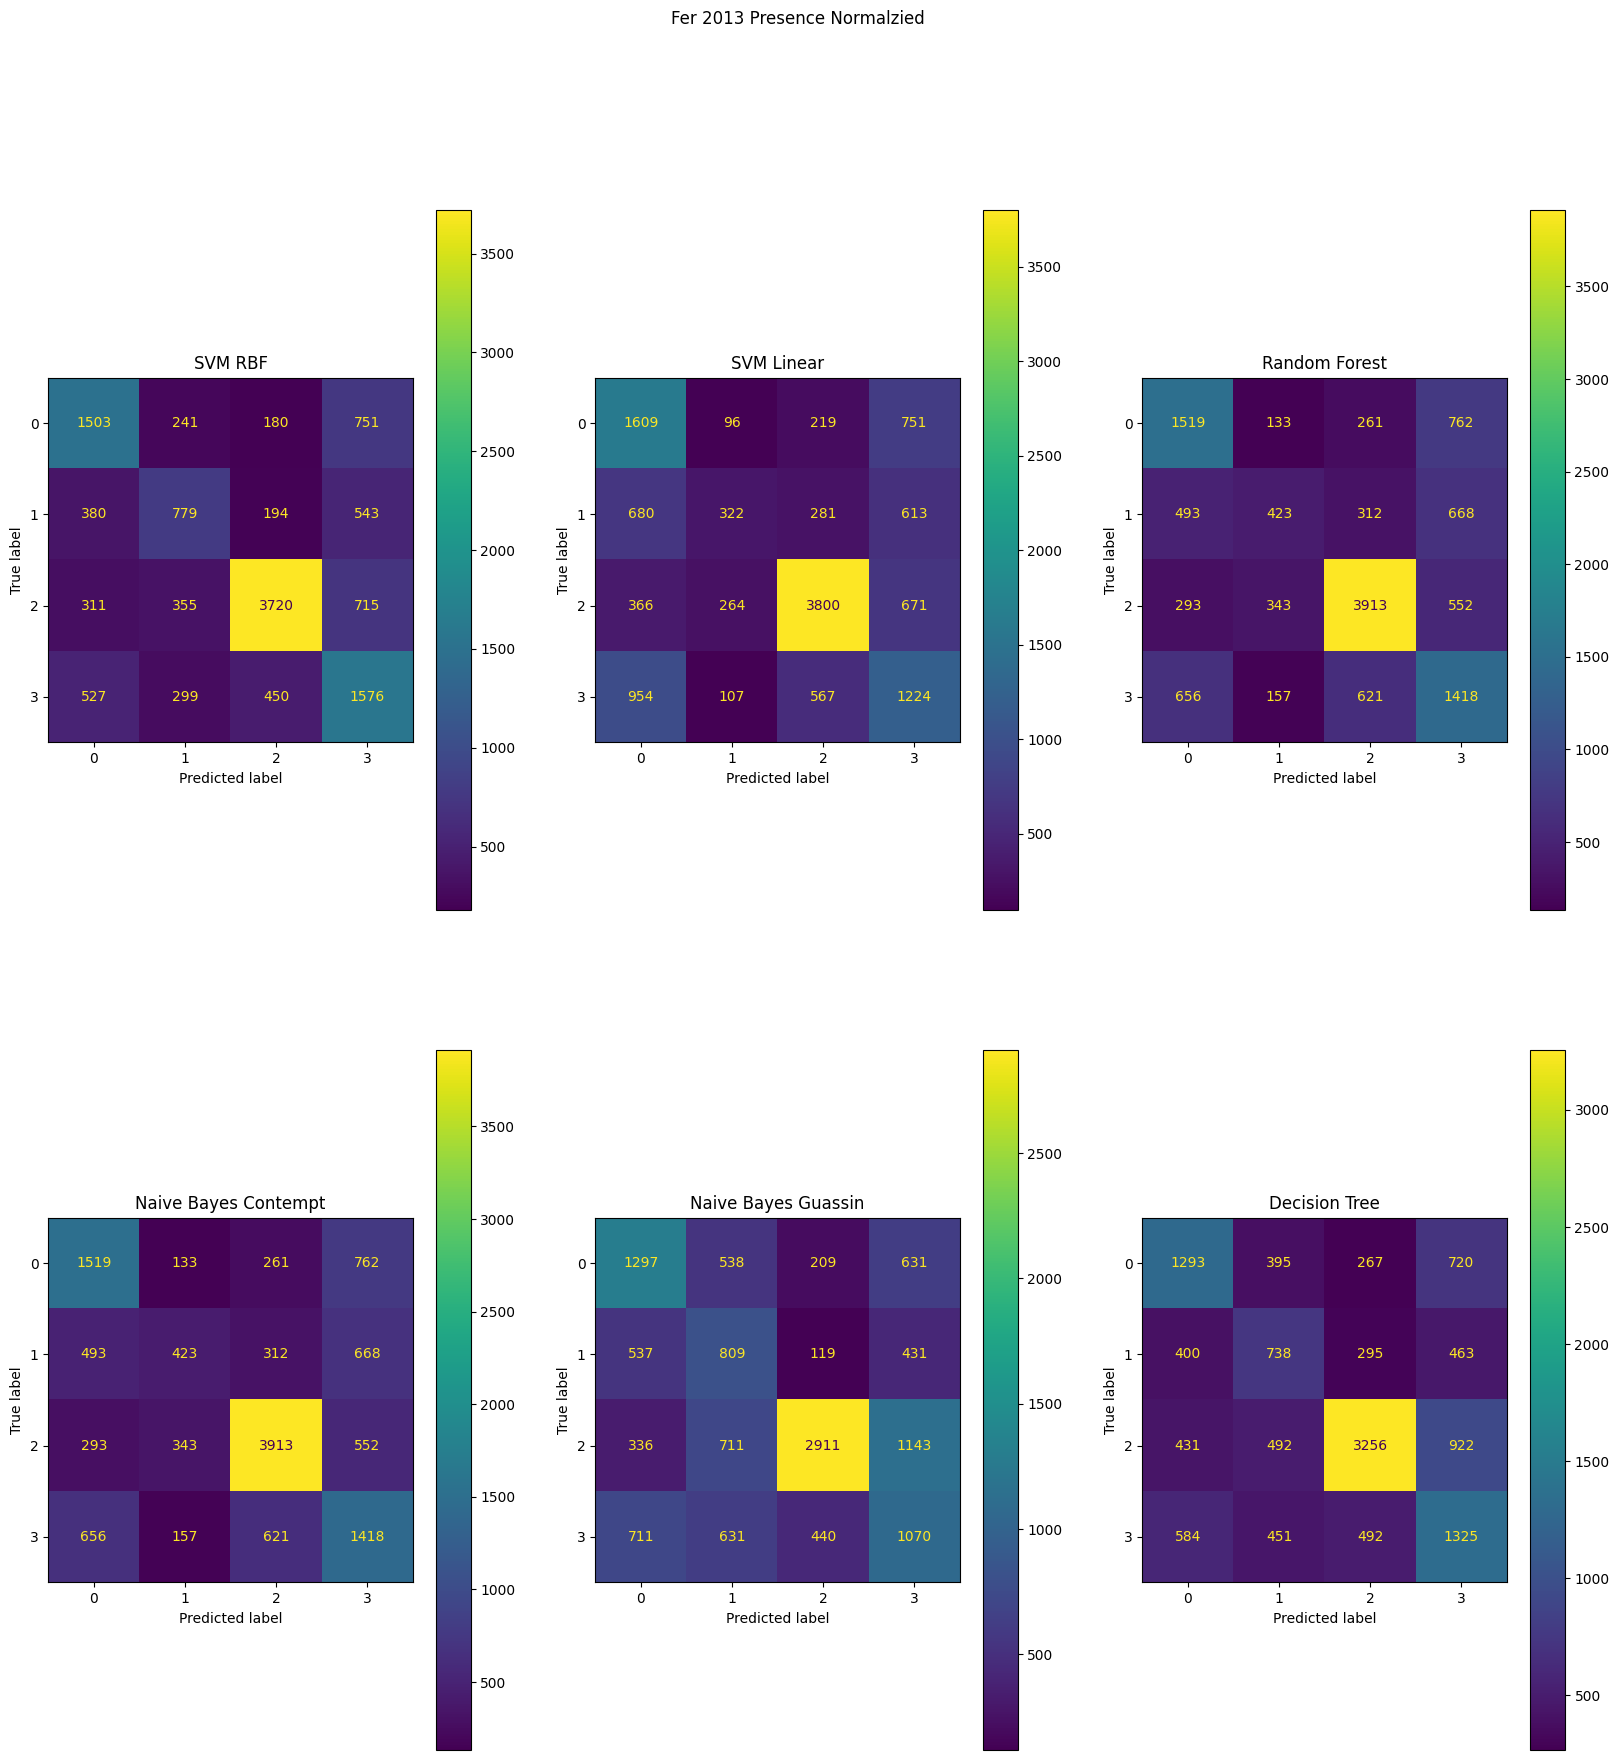

In [103]:
CMplot("Fer 2013 Presence Normalzied", y_test_fer_z_p, svm_y_p_fer_z,  svm_y_p_fer_linear_z,
       rf_fer_p_z, rf_fer_p_z, gnd_fer_p_z,tree_fer_p_z)

# No Naive Bayes Contempt

In [104]:
metics_reports(y_test_fer_z_p, svm_y_p_fer_z)

Accurary Score
0.6050782497604599
F1 Score
0.5636367803027027
Classification Report
              precision    recall  f1-score   support

       Anger       0.55      0.56      0.56      2675
        Fear       0.47      0.41      0.44      1896
       Happy       0.82      0.73      0.77      5101
         Sad       0.44      0.55      0.49      2852

    accuracy                           0.61     12524
   macro avg       0.57      0.56      0.56     12524
weighted avg       0.62      0.61      0.61     12524



In [105]:
metics_reports(y_test_fer_z_p, svm_y_p_fer_linear_z)

Accurary Score
0.5553337591823698
F1 Score
0.4787435351808406
Classification Report
              precision    recall  f1-score   support

       Anger       0.45      0.60      0.51      2675
        Fear       0.41      0.17      0.24      1896
       Happy       0.78      0.74      0.76      5101
         Sad       0.38      0.43      0.40      2852

    accuracy                           0.56     12524
   macro avg       0.50      0.49      0.48     12524
weighted avg       0.56      0.56      0.55     12524



In [106]:
metics_reports(y_test_fer_z_p, rf_fer_p_z)

Accurary Score
0.5807250079846694
F1 Score
0.5114721476391705
Classification Report
              precision    recall  f1-score   support

       Anger       0.51      0.57      0.54      2675
        Fear       0.40      0.22      0.29      1896
       Happy       0.77      0.77      0.77      5101
         Sad       0.42      0.50      0.45      2852

    accuracy                           0.58     12524
   macro avg       0.52      0.51      0.51     12524
weighted avg       0.58      0.58      0.57     12524



In [107]:
metics_reports(y_test_fer_z_p, gnd_fer_p_z)

Accurary Score
0.48602682848930057
F1 Score
0.4580360410130813
Classification Report
              precision    recall  f1-score   support

       Anger       0.45      0.48      0.47      2675
        Fear       0.30      0.43      0.35      1896
       Happy       0.79      0.57      0.66      5101
         Sad       0.33      0.38      0.35      2852

    accuracy                           0.49     12524
   macro avg       0.47      0.46      0.46     12524
weighted avg       0.54      0.49      0.50     12524



In [108]:
metics_reports(y_test_fer_z_p, tree_fer_p_z)

Accurary Score
0.5279463430213989
F1 Score
0.49144971785637254
Classification Report
              precision    recall  f1-score   support

       Anger       0.48      0.48      0.48      2675
        Fear       0.36      0.39      0.37      1896
       Happy       0.76      0.64      0.69      5101
         Sad       0.39      0.46      0.42      2852

    accuracy                           0.53     12524
   macro avg       0.49      0.49      0.49     12524
weighted avg       0.55      0.53      0.54     12524



### Fer 2013 Intensity 
- Best Model: SVM
- Worst Model: CNB

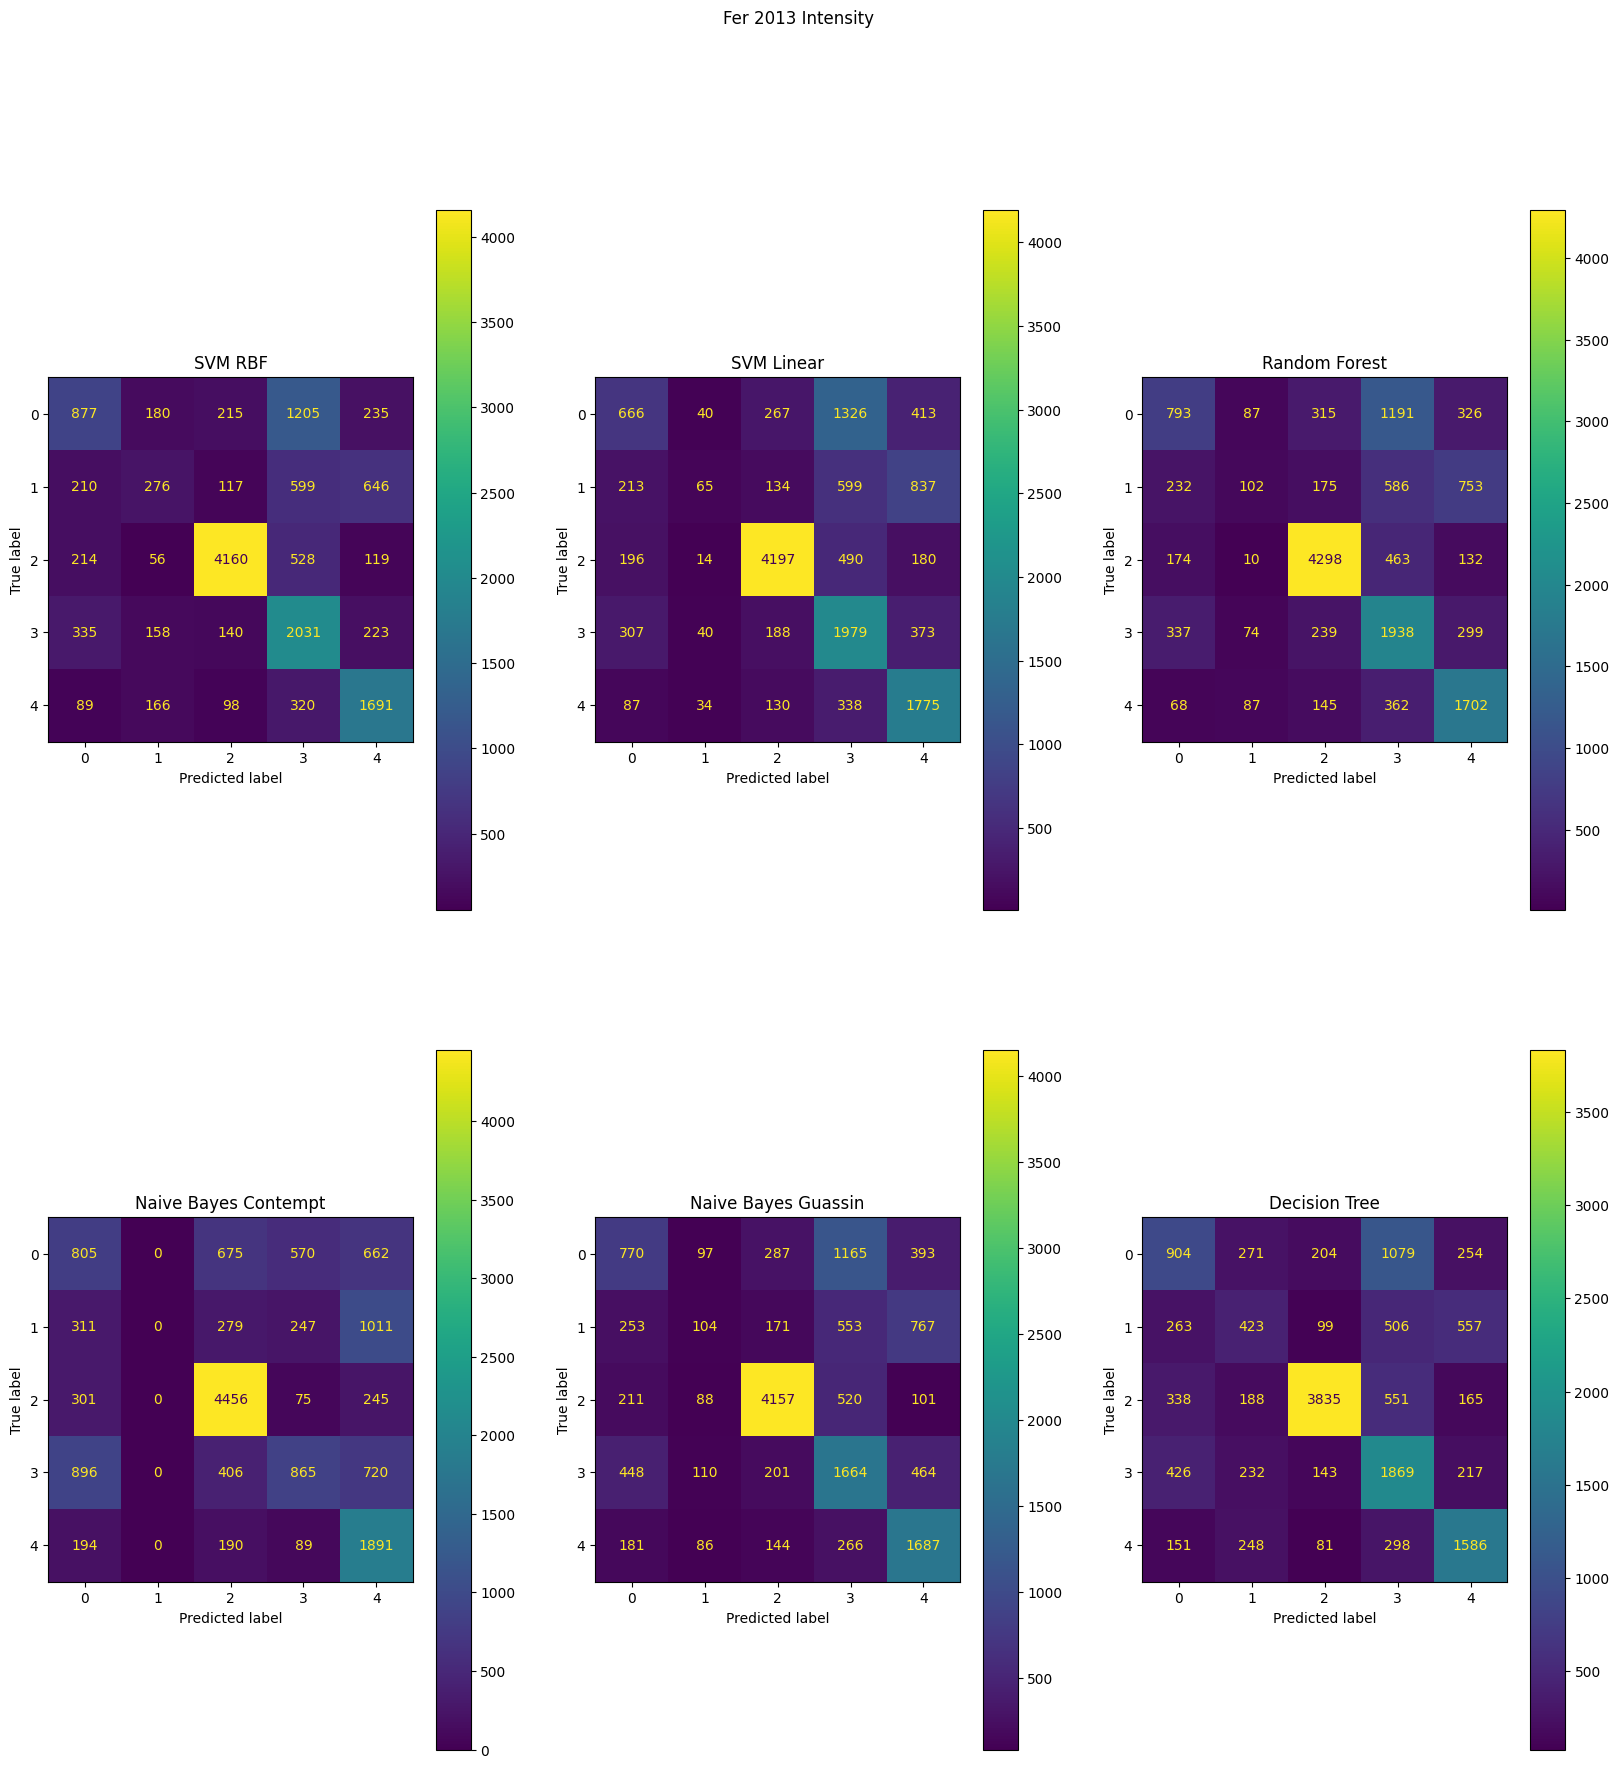

In [109]:
CMplot("Fer 2013 Intensity", y_test_fer_i, svm_y_fer_i,  svm_linear_y_fer_i,
       rf_fer_y_i, cnb_fer_i_y, gnd_fer_i_y, tree_fer_i_y)

In [110]:
metics_reports(y_test_fer_i, svm_y_fer_i)

Accurary Score
0.6068645889306824
F1 Score
0.5253427555324861
Classification Report
              precision    recall  f1-score   support

       Anger       0.51      0.32      0.40      2712
        Fear       0.33      0.15      0.21      1848
       Happy       0.88      0.82      0.85      5077
         Sad       0.43      0.70      0.54      2887
    Surprise       0.58      0.72      0.64      2364

    accuracy                           0.61     14888
   macro avg       0.55      0.54      0.53     14888
weighted avg       0.61      0.61      0.59     14888



In [111]:
metics_reports(y_test_fer_i, svm_linear_y_fer_i)

Accurary Score
0.5831542181622783
F1 Score
0.46783980309296636
Classification Report
              precision    recall  f1-score   support

       Anger       0.45      0.25      0.32      2712
        Fear       0.34      0.04      0.06      1848
       Happy       0.85      0.83      0.84      5077
         Sad       0.42      0.69      0.52      2887
    Surprise       0.50      0.75      0.60      2364

    accuracy                           0.58     14888
   macro avg       0.51      0.51      0.47     14888
weighted avg       0.58      0.58      0.55     14888



In [112]:
metics_reports(y_test_fer_i, rf_fer_y_i)

Accurary Score
0.5932966147232671
F1 Score
0.48618604844291163
Classification Report
              precision    recall  f1-score   support

       Anger       0.49      0.29      0.37      2712
        Fear       0.28      0.06      0.09      1848
       Happy       0.83      0.85      0.84      5077
         Sad       0.43      0.67      0.52      2887
    Surprise       0.53      0.72      0.61      2364

    accuracy                           0.59     14888
   macro avg       0.51      0.52      0.49     14888
weighted avg       0.58      0.59      0.56     14888



In [113]:
metics_reports(y_test_fer_i, cnb_fer_i_y)

Accurary Score
0.5384873723804406
F1 Score
0.4053587780921717
Classification Report
              precision    recall  f1-score   support

       Anger       0.32      0.30      0.31      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.74      0.88      0.80      5077
         Sad       0.47      0.30      0.37      2887
    Surprise       0.42      0.80      0.55      2364

    accuracy                           0.54     14888
   macro avg       0.39      0.45      0.41     14888
weighted avg       0.47      0.54      0.49     14888



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [114]:
metics_reports(y_test_fer_i, gnd_fer_i_y)

Accurary Score
0.5630037614185922
F1 Score
0.46199324650195395
Classification Report
              precision    recall  f1-score   support

       Anger       0.41      0.28      0.34      2712
        Fear       0.21      0.06      0.09      1848
       Happy       0.84      0.82      0.83      5077
         Sad       0.40      0.58      0.47      2887
    Surprise       0.49      0.71      0.58      2364

    accuracy                           0.56     14888
   macro avg       0.47      0.49      0.46     14888
weighted avg       0.54      0.56      0.54     14888



In [115]:
metics_reports(y_test_fer_i, tree_fer_i_y)

Accurary Score
0.5787882858678131
F1 Score
0.5179849900144223
Classification Report
              precision    recall  f1-score   support

       Anger       0.43      0.33      0.38      2712
        Fear       0.31      0.23      0.26      1848
       Happy       0.88      0.76      0.81      5077
         Sad       0.43      0.65      0.52      2887
    Surprise       0.57      0.67      0.62      2364

    accuracy                           0.58     14888
   macro avg       0.53      0.53      0.52     14888
weighted avg       0.59      0.58      0.58     14888



### Fer 2013 Persence + Intensity 
- Best Model: SVM, RF
- Worst Model: CNB

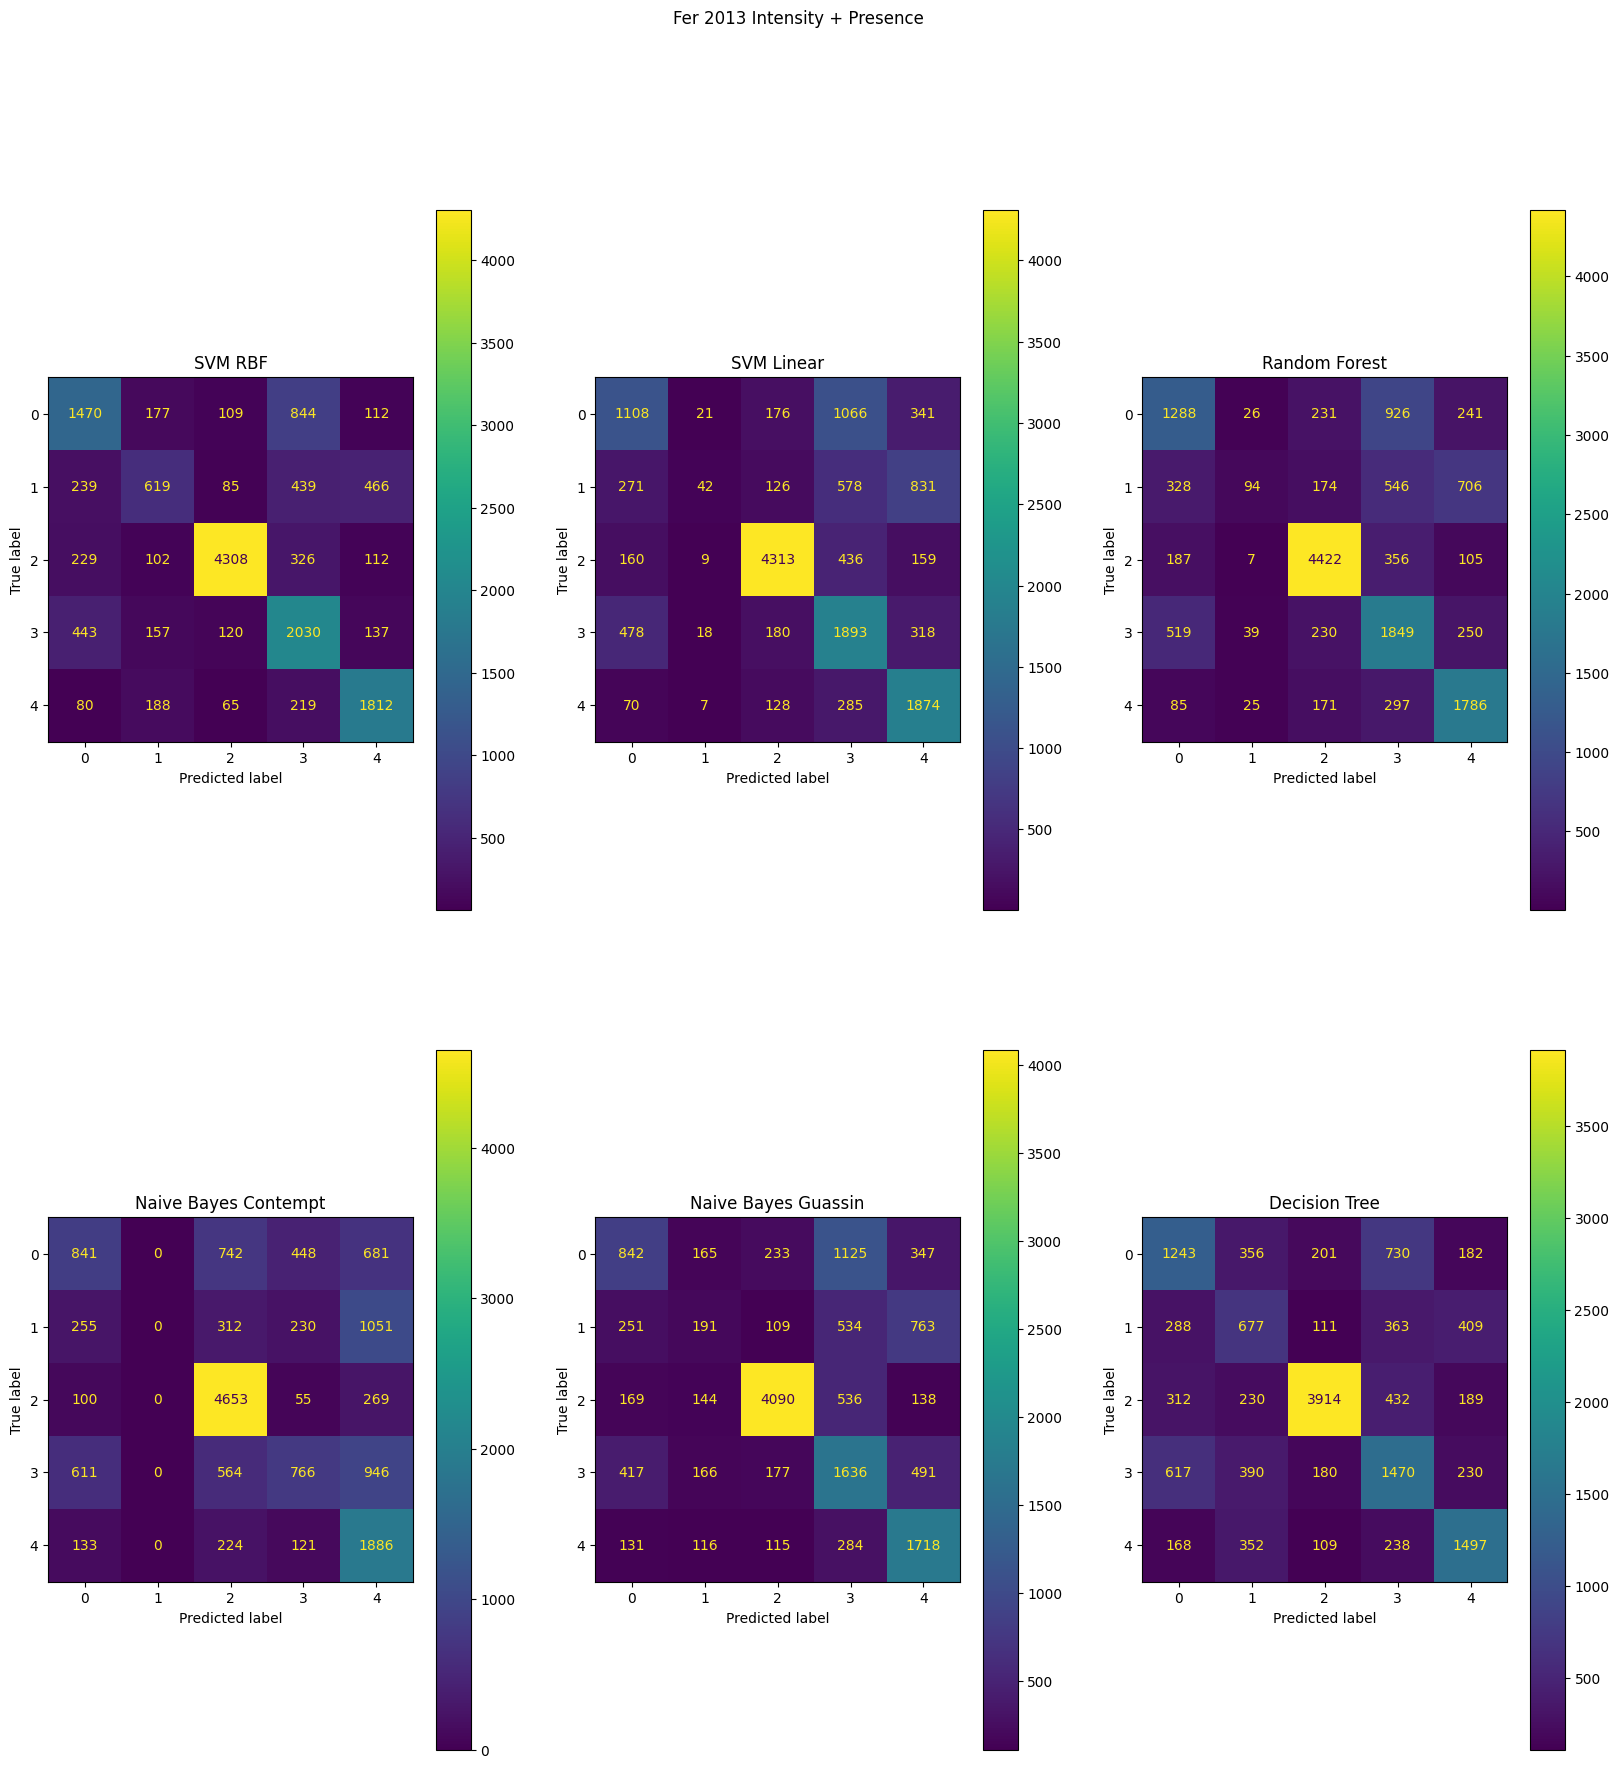

In [119]:
CMplot("Fer 2013 Intensity + Presence", y_test_fer_ip, svm_y_fer_ip, svm_linear_y_fer_ip,
       rf_fer_y_ip, cnb_fer_ip_y, gnd_fer_ip_y, tree_fer_ip_y)

In [117]:
metics_reports(y_test_fer_ip, svm_y_fer_ip)

Accurary Score
0.6877350886620097
F1 Score
0.6355142380787272
Classification Report
              precision    recall  f1-score   support

       Anger       0.60      0.54      0.57      2712
        Fear       0.50      0.33      0.40      1848
       Happy       0.92      0.85      0.88      5077
         Sad       0.53      0.70      0.60      2887
    Surprise       0.69      0.77      0.72      2364

    accuracy                           0.69     14888
   macro avg       0.65      0.64      0.64     14888
weighted avg       0.70      0.69      0.69     14888



In [118]:
metics_reports(y_test_fer_ip, svm_linear_y_fer_ip)

Accurary Score
0.6199623858140785
F1 Score
0.5068177209118693
Classification Report
              precision    recall  f1-score   support

       Anger       0.53      0.41      0.46      2712
        Fear       0.43      0.02      0.04      1848
       Happy       0.88      0.85      0.86      5077
         Sad       0.44      0.66      0.53      2887
    Surprise       0.53      0.79      0.64      2364

    accuracy                           0.62     14888
   macro avg       0.56      0.55      0.51     14888
weighted avg       0.62      0.62      0.59     14888



In [120]:
metics_reports(y_test_fer_ip, rf_fer_y_ip)

Accurary Score
0.6340005373455132
F1 Score
0.5295620816191022
Classification Report
              precision    recall  f1-score   support

       Anger       0.54      0.47      0.50      2712
        Fear       0.49      0.05      0.09      1848
       Happy       0.85      0.87      0.86      5077
         Sad       0.47      0.64      0.54      2887
    Surprise       0.58      0.76      0.66      2364

    accuracy                           0.63     14888
   macro avg       0.58      0.56      0.53     14888
weighted avg       0.63      0.63      0.60     14888



In [121]:
metics_reports(y_test_fer_ip, cnb_fer_ip_y)

Accurary Score
0.5471520687802257
F1 Score
0.4059540762893481
Classification Report
              precision    recall  f1-score   support

       Anger       0.43      0.31      0.36      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.72      0.92      0.80      5077
         Sad       0.47      0.27      0.34      2887
    Surprise       0.39      0.80      0.52      2364

    accuracy                           0.55     14888
   macro avg       0.40      0.46      0.41     14888
weighted avg       0.48      0.55      0.49     14888



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [122]:
metics_reports(y_test_fer_ip, gnd_fer_ip_y)

Accurary Score
0.5693847393874261
F1 Score
0.4819658194470692
Classification Report
              precision    recall  f1-score   support

       Anger       0.47      0.31      0.37      2712
        Fear       0.24      0.10      0.15      1848
       Happy       0.87      0.81      0.83      5077
         Sad       0.40      0.57      0.47      2887
    Surprise       0.50      0.73      0.59      2364

    accuracy                           0.57     14888
   macro avg       0.49      0.50      0.48     14888
weighted avg       0.57      0.57      0.55     14888



In [123]:
metics_reports(y_test_fer_ip, tree_fer_ip_y)

Accurary Score
0.5911472326706072
F1 Score
0.5456209277212991
Classification Report
              precision    recall  f1-score   support

       Anger       0.47      0.46      0.47      2712
        Fear       0.34      0.37      0.35      1848
       Happy       0.87      0.77      0.82      5077
         Sad       0.45      0.51      0.48      2887
    Surprise       0.60      0.63      0.61      2364

    accuracy                           0.59     14888
   macro avg       0.55      0.55      0.55     14888
weighted avg       0.61      0.59      0.60     14888



### Archieve Persence Normilized
- Best Model: SVM
- Worst Model: GND

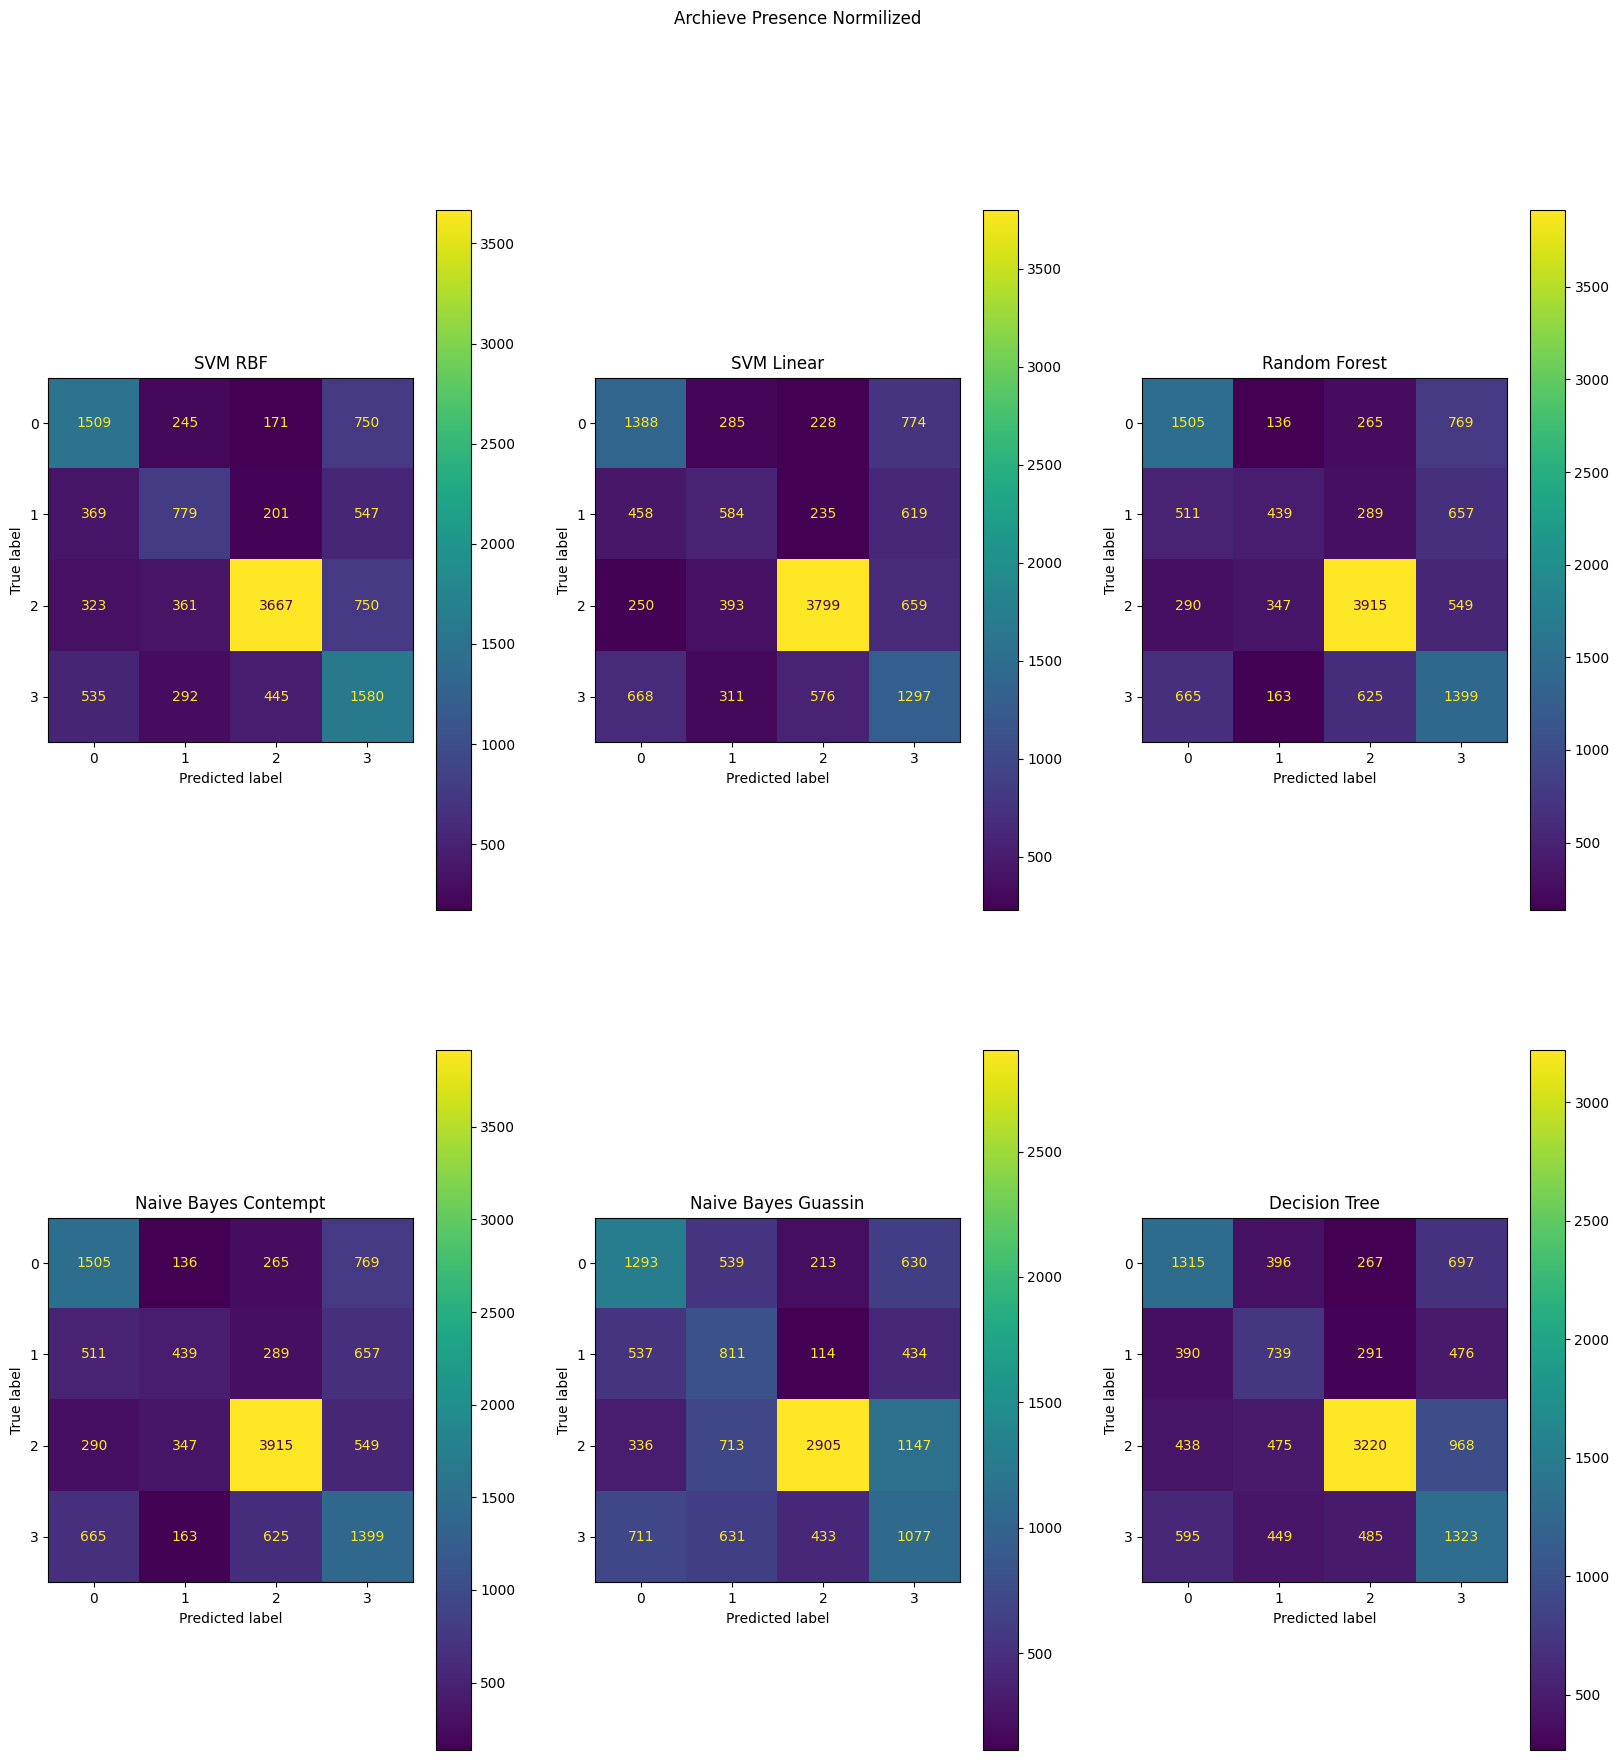

In [130]:
CMplot("Archieve Presence Normilized", y_test_archieve_z_p, svm_y_p_archieve_z, svm_y_p_archieve_linear_z,
       rf_a_p_z, rf_a_p_z, gnd_a_p_z, tree_a_p_z)

In [125]:
metics_reports(y_test_archieve_z_p, svm_y_p_archieve_z)

Accurary Score
0.6016448419035452
F1 Score
0.5616710847318994
Classification Report
              precision    recall  f1-score   support

       Anger       0.55      0.56      0.56      2675
        Fear       0.46      0.41      0.44      1896
       Happy       0.82      0.72      0.77      5101
         Sad       0.44      0.55      0.49      2852

    accuracy                           0.60     12524
   macro avg       0.57      0.56      0.56     12524
weighted avg       0.62      0.60      0.61     12524



In [126]:
metics_reports(y_test_archieve_z_p, svm_y_p_archieve_linear_z)

Accurary Score
0.5643564356435643
F1 Score
0.5074668112030976
Classification Report
              precision    recall  f1-score   support

       Anger       0.50      0.52      0.51      2675
        Fear       0.37      0.31      0.34      1896
       Happy       0.79      0.74      0.76      5101
         Sad       0.39      0.45      0.42      2852

    accuracy                           0.56     12524
   macro avg       0.51      0.51      0.51     12524
weighted avg       0.57      0.56      0.57     12524



In [127]:
metics_reports(y_test_archieve_z_p, rf_a_p_z)

Accurary Score
0.5795273075694666
F1 Score
0.5112705221549915
Classification Report
              precision    recall  f1-score   support

       Anger       0.51      0.56      0.53      2675
        Fear       0.40      0.23      0.29      1896
       Happy       0.77      0.77      0.77      5101
         Sad       0.41      0.49      0.45      2852

    accuracy                           0.58     12524
   macro avg       0.52      0.51      0.51     12524
weighted avg       0.58      0.58      0.57     12524



In [129]:
metics_reports(y_test_archieve_z_p, gnd_a_p_z)

Accurary Score
0.4859469817949537
F1 Score
0.45818934531664457
Classification Report
              precision    recall  f1-score   support

       Anger       0.45      0.48      0.47      2675
        Fear       0.30      0.43      0.35      1896
       Happy       0.79      0.57      0.66      5101
         Sad       0.33      0.38      0.35      2852

    accuracy                           0.49     12524
   macro avg       0.47      0.46      0.46     12524
weighted avg       0.54      0.49      0.50     12524



In [131]:
metics_reports(y_test_archieve_z_p, tree_a_p_z)

Accurary Score
0.5267486426061961
F1 Score
0.491561961423713
Classification Report
              precision    recall  f1-score   support

       Anger       0.48      0.49      0.49      2675
        Fear       0.36      0.39      0.37      1896
       Happy       0.76      0.63      0.69      5101
         Sad       0.38      0.46      0.42      2852

    accuracy                           0.53     12524
   macro avg       0.49      0.49      0.49     12524
weighted avg       0.55      0.53      0.54     12524



### Archieve Persence 
- Best Model: SVM
- Worst Model: CNB

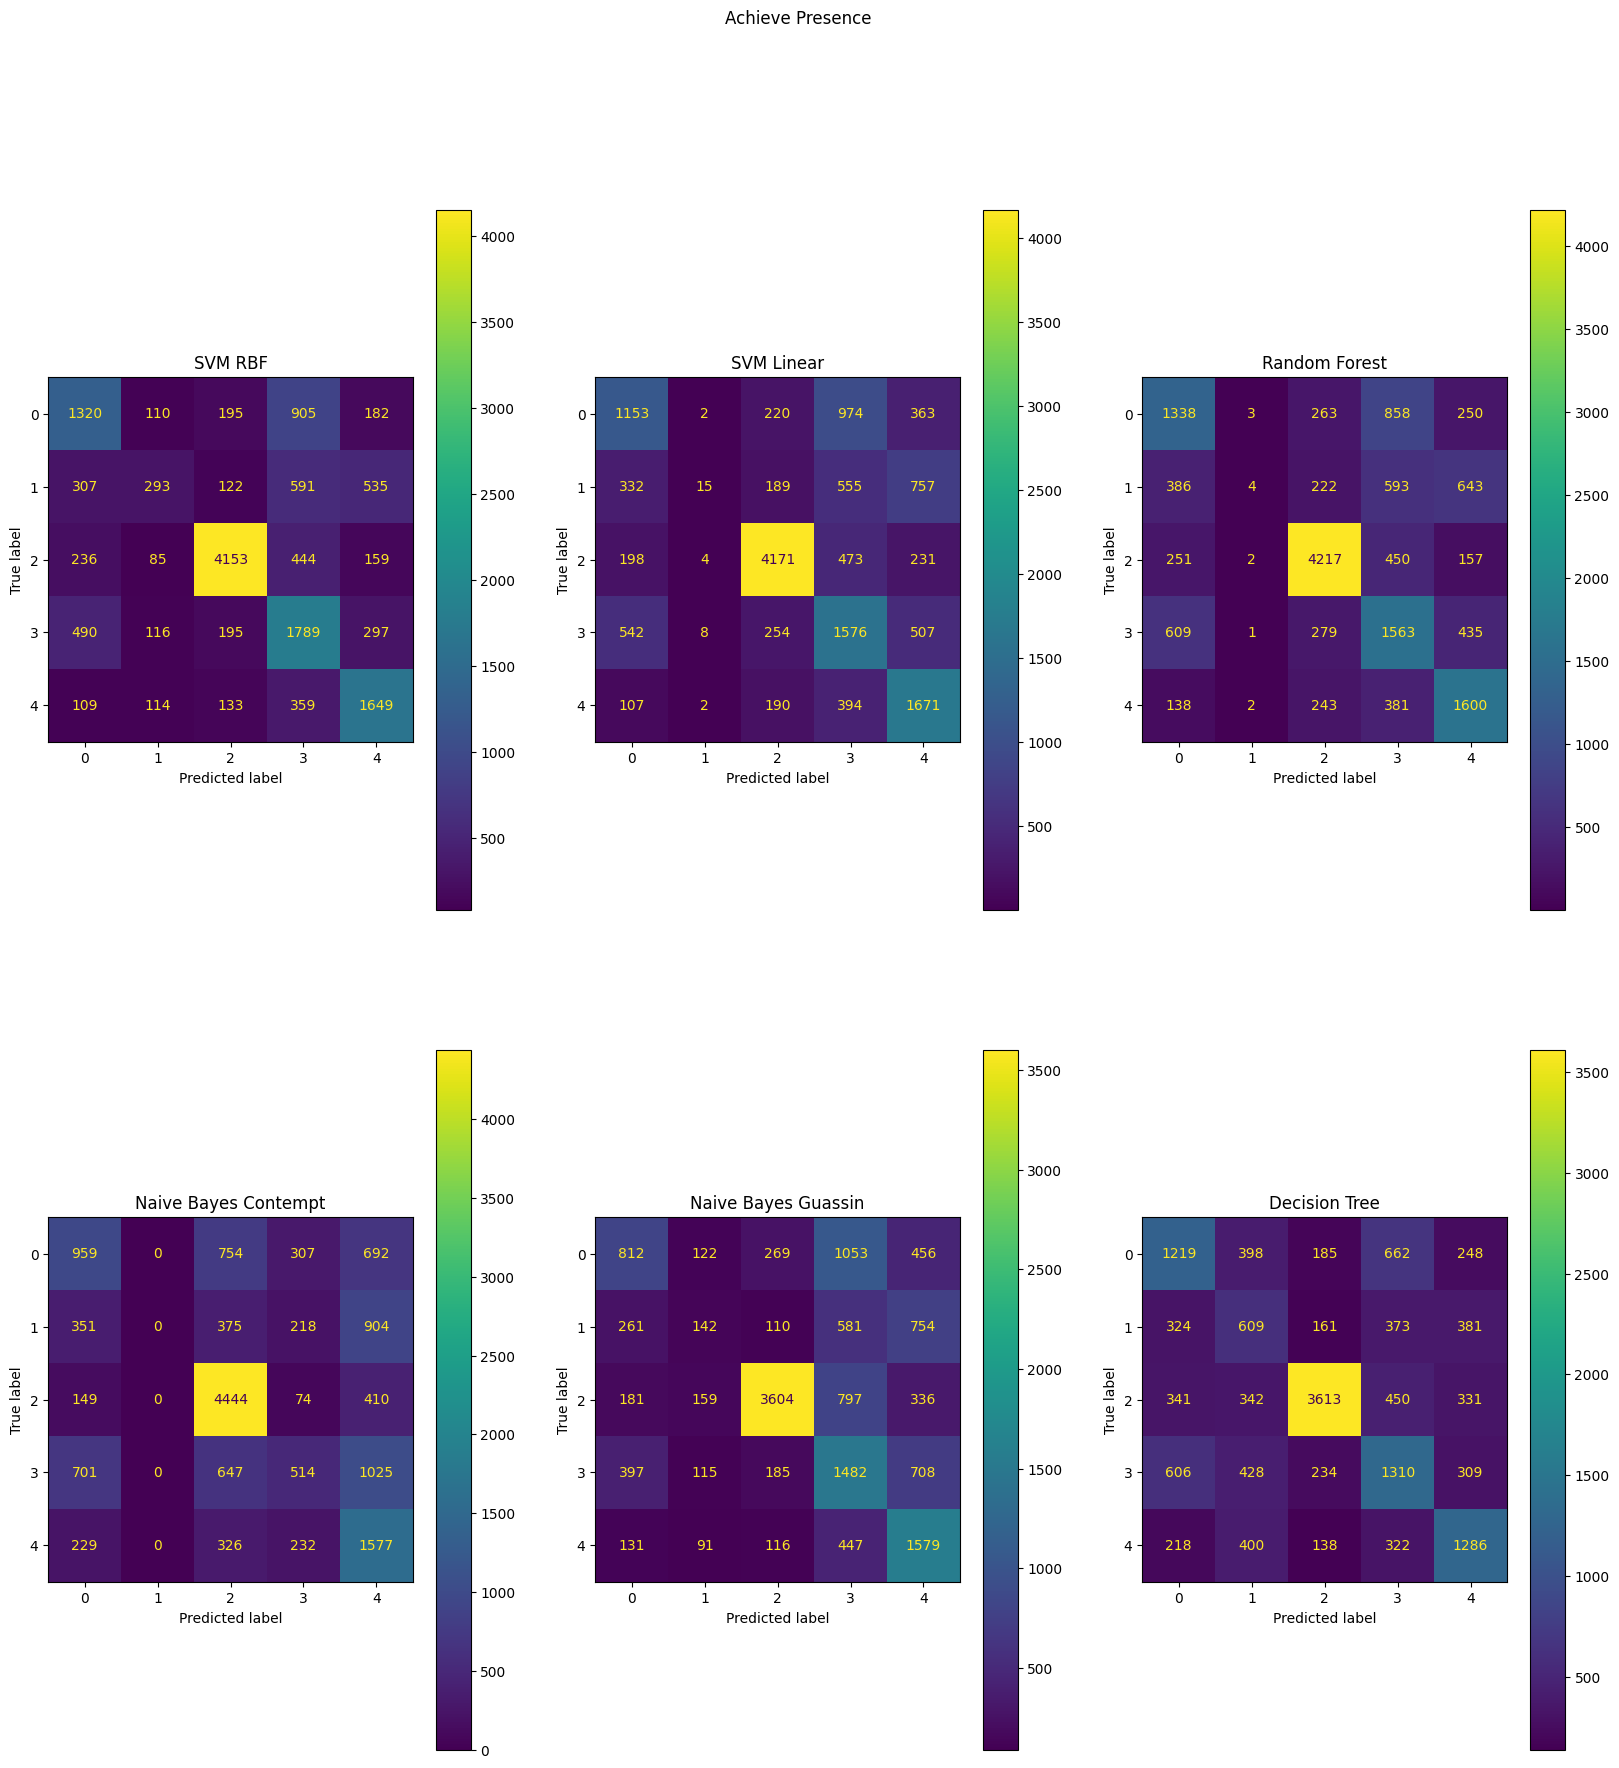

In [132]:
CMplot("Achieve Presence", y_test_archieve_p, svm_y_archieve_p, svm_linear_y_archieve_p,
       rf_archieve_p_y, cnb_archieve_p_y, gnd_archieve_p_y, tree_archieve_p_y)

In [133]:
metics_reports(y_test_archieve_p, svm_y_archieve_p)

Accurary Score
0.6182160128962924
F1 Score
0.545729257694936
Classification Report
              precision    recall  f1-score   support

       Anger       0.54      0.49      0.51      2712
        Fear       0.41      0.16      0.23      1848
       Happy       0.87      0.82      0.84      5077
         Sad       0.44      0.62      0.51      2887
    Surprise       0.58      0.70      0.64      2364

    accuracy                           0.62     14888
   macro avg       0.57      0.56      0.55     14888
weighted avg       0.62      0.62      0.61     14888



In [134]:
metics_reports(y_test_archieve_p, svm_linear_y_archieve_p)

Accurary Score
0.5767060720042988
F1 Score
0.46513146816050144
Classification Report
              precision    recall  f1-score   support

       Anger       0.49      0.43      0.46      2712
        Fear       0.48      0.01      0.02      1848
       Happy       0.83      0.82      0.83      5077
         Sad       0.40      0.55      0.46      2887
    Surprise       0.47      0.71      0.57      2364

    accuracy                           0.58     14888
   macro avg       0.54      0.50      0.47     14888
weighted avg       0.59      0.58      0.55     14888



In [135]:
metics_reports(y_test_archieve_p, rf_archieve_p_y)

Accurary Score
0.5858409457281032
F1 Score
0.4734249087277499
Classification Report
              precision    recall  f1-score   support

       Anger       0.49      0.49      0.49      2712
        Fear       0.33      0.00      0.00      1848
       Happy       0.81      0.83      0.82      5077
         Sad       0.41      0.54      0.46      2887
    Surprise       0.52      0.68      0.59      2364

    accuracy                           0.59     14888
   macro avg       0.51      0.51      0.47     14888
weighted avg       0.57      0.59      0.55     14888



In [136]:
metics_reports(y_test_archieve_p, cnb_archieve_p_y)

Accurary Score
0.503358409457281
F1 Score
0.36719750198700707
Classification Report
              precision    recall  f1-score   support

       Anger       0.40      0.35      0.38      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.68      0.88      0.76      5077
         Sad       0.38      0.18      0.24      2887
    Surprise       0.34      0.67      0.45      2364

    accuracy                           0.50     14888
   macro avg       0.36      0.41      0.37     14888
weighted avg       0.43      0.50      0.45     14888



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [137]:
metics_reports(y_test_archieve_p, gnd_archieve_p_y)

Accurary Score
0.5117544331004836
F1 Score
0.4329253983991898
Classification Report
              precision    recall  f1-score   support

       Anger       0.46      0.30      0.36      2712
        Fear       0.23      0.08      0.11      1848
       Happy       0.84      0.71      0.77      5077
         Sad       0.34      0.51      0.41      2887
    Surprise       0.41      0.67      0.51      2364

    accuracy                           0.51     14888
   macro avg       0.45      0.45      0.43     14888
weighted avg       0.53      0.51      0.50     14888



In [138]:
metics_reports(y_test_archieve_p, tree_archieve_p_y)

Accurary Score
0.5398307361633531
F1 Score
0.49594803466664505
Classification Report
              precision    recall  f1-score   support

       Anger       0.45      0.45      0.45      2712
        Fear       0.28      0.33      0.30      1848
       Happy       0.83      0.71      0.77      5077
         Sad       0.42      0.45      0.44      2887
    Surprise       0.50      0.54      0.52      2364

    accuracy                           0.54     14888
   macro avg       0.50      0.50      0.50     14888
weighted avg       0.56      0.54      0.55     14888



### Archieve Intensity
- Best Model: SVM
- Worst Model: CNB

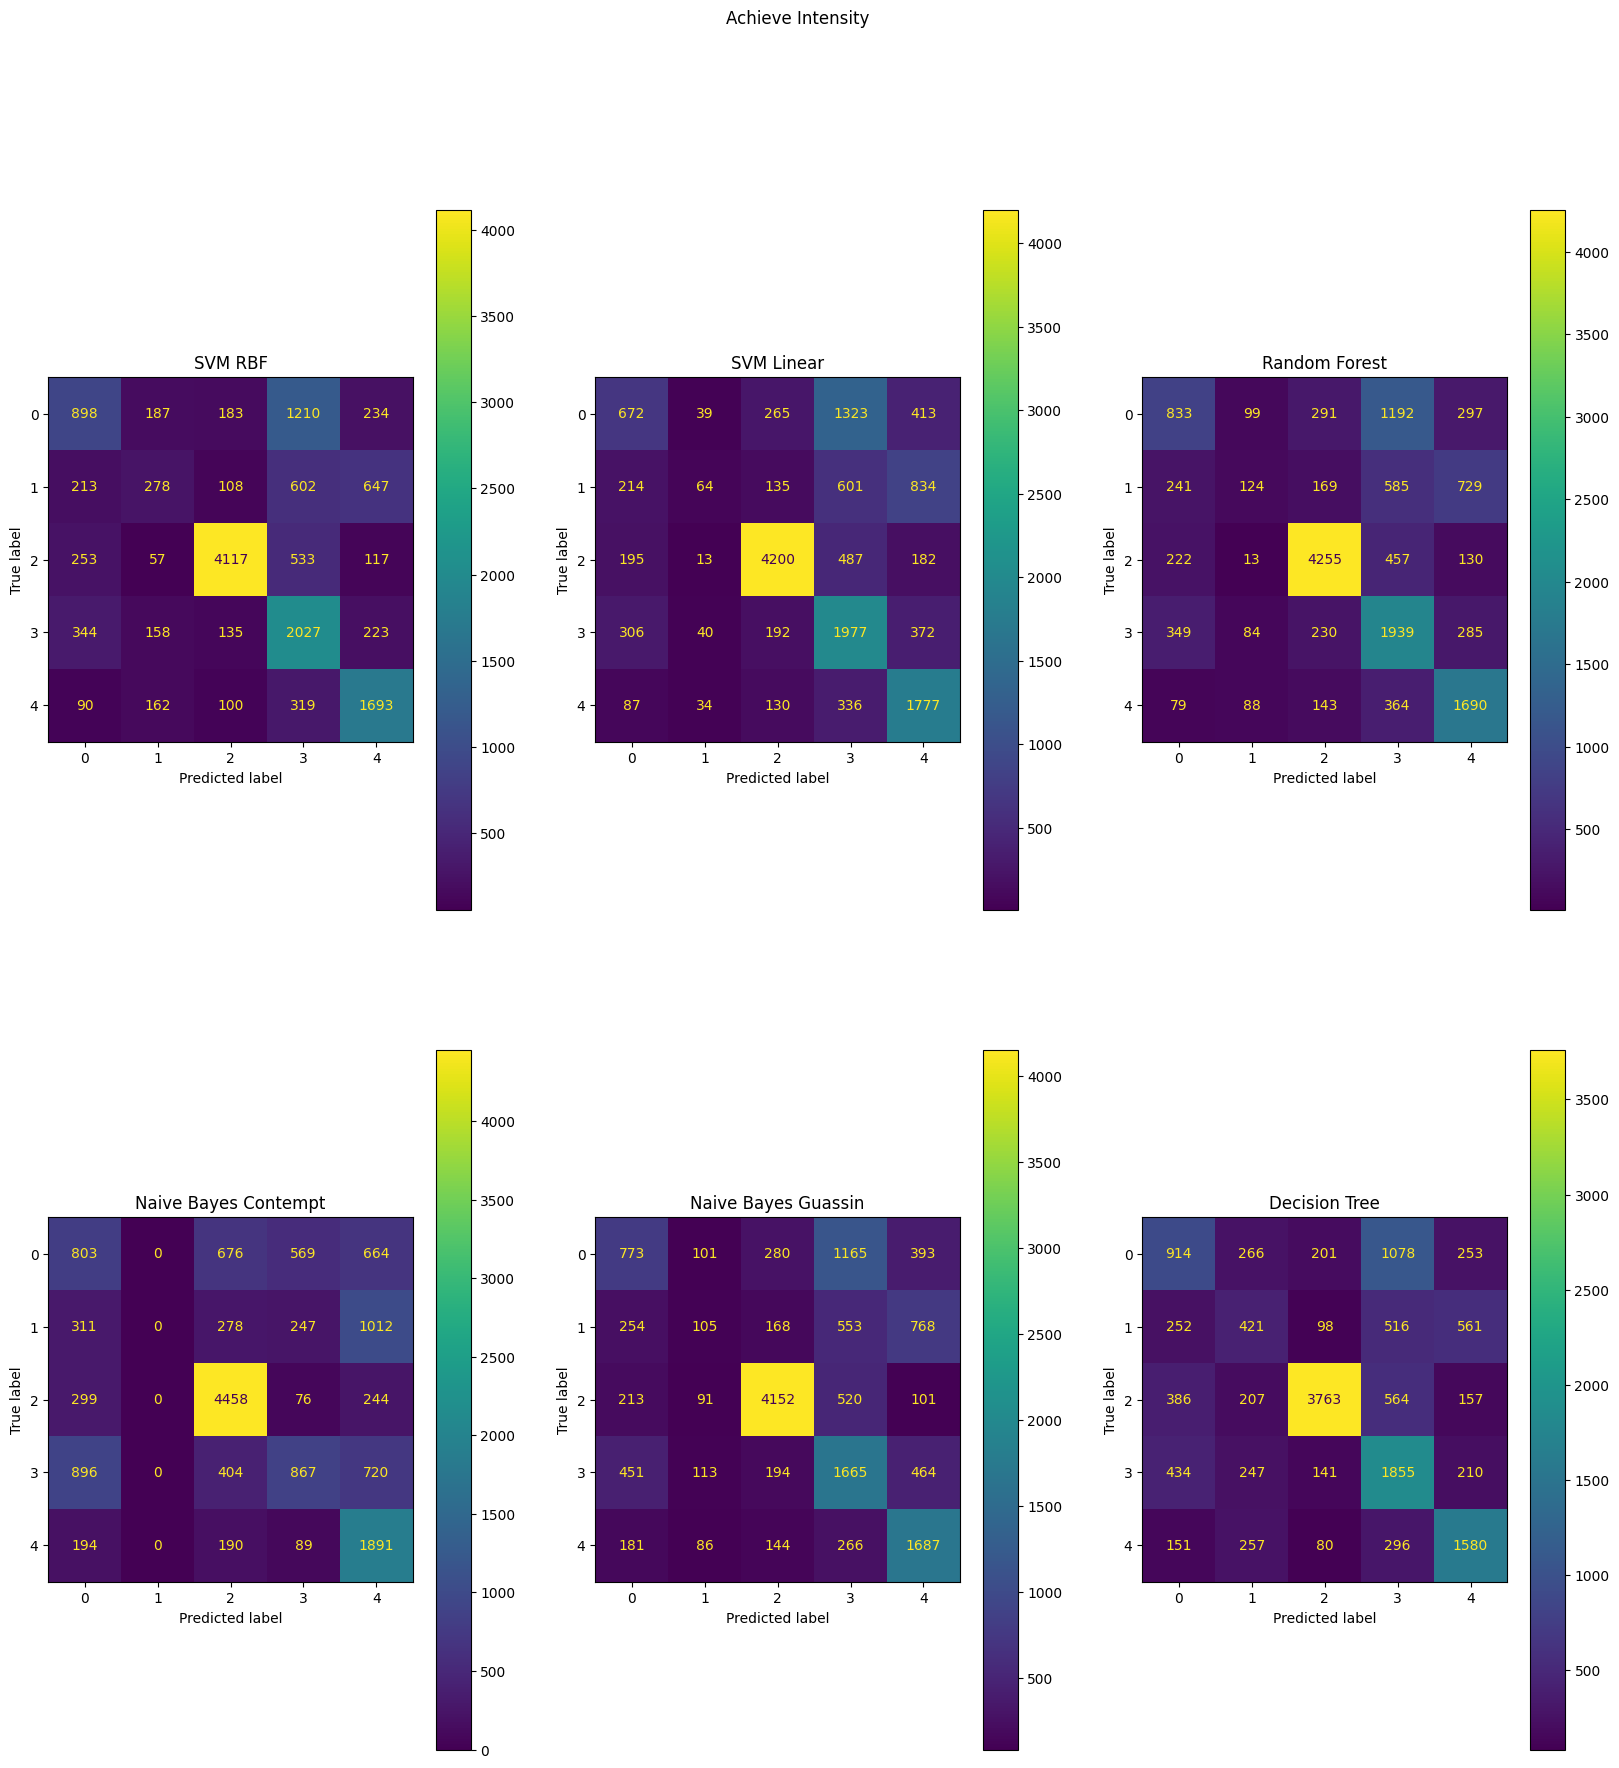

In [140]:
CMplot("Achieve Intensity", y_test_archieve_i, svm_y_archieve_i, svm_linear_y_archieve_i,
       rf_archieve_i_y, cnb_archieve_i_y, gnd_archieve_i_y, tree_archieve_i_y)

In [141]:
metics_reports(y_test_archieve_i, svm_y_archieve_i)

Accurary Score
0.6053868887694788
F1 Score
0.5257074974703658
Classification Report
              precision    recall  f1-score   support

       Anger       0.50      0.33      0.40      2712
        Fear       0.33      0.15      0.21      1848
       Happy       0.89      0.81      0.85      5077
         Sad       0.43      0.70      0.53      2887
    Surprise       0.58      0.72      0.64      2364

    accuracy                           0.61     14888
   macro avg       0.55      0.54      0.53     14888
weighted avg       0.61      0.61      0.59     14888



In [142]:
metics_reports(y_test_archieve_i, svm_linear_y_archieve_i)

Accurary Score
0.5836915636754433
F1 Score
0.4683174524441734
Classification Report
              precision    recall  f1-score   support

       Anger       0.46      0.25      0.32      2712
        Fear       0.34      0.03      0.06      1848
       Happy       0.85      0.83      0.84      5077
         Sad       0.42      0.68      0.52      2887
    Surprise       0.50      0.75      0.60      2364

    accuracy                           0.58     14888
   macro avg       0.51      0.51      0.47     14888
weighted avg       0.58      0.58      0.55     14888



In [143]:
metics_reports(y_test_archieve_i, rf_archieve_i_y)

Accurary Score
0.593833960236432
F1 Score
0.4920287254356122
Classification Report
              precision    recall  f1-score   support

       Anger       0.48      0.31      0.38      2712
        Fear       0.30      0.07      0.11      1848
       Happy       0.84      0.84      0.84      5077
         Sad       0.43      0.67      0.52      2887
    Surprise       0.54      0.71      0.62      2364

    accuracy                           0.59     14888
   macro avg       0.52      0.52      0.49     14888
weighted avg       0.58      0.59      0.57     14888



In [144]:
metics_reports(y_test_archieve_i, cnb_archieve_i_y)

Accurary Score
0.5386217087587318
F1 Score
0.4054311266784129
Classification Report
              precision    recall  f1-score   support

       Anger       0.32      0.30      0.31      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.74      0.88      0.80      5077
         Sad       0.47      0.30      0.37      2887
    Surprise       0.42      0.80      0.55      2364

    accuracy                           0.54     14888
   macro avg       0.39      0.45      0.41     14888
weighted avg       0.47      0.54      0.49     14888



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [145]:
metics_reports(y_test_archieve_i, gnd_archieve_i_y)

Accurary Score
0.5630037614185922
F1 Score
0.4623971357908059
Classification Report
              precision    recall  f1-score   support

       Anger       0.41      0.29      0.34      2712
        Fear       0.21      0.06      0.09      1848
       Happy       0.84      0.82      0.83      5077
         Sad       0.40      0.58      0.47      2887
    Surprise       0.49      0.71      0.58      2364

    accuracy                           0.56     14888
   macro avg       0.47      0.49      0.46     14888
weighted avg       0.54      0.56      0.54     14888



In [146]:
metics_reports(y_test_archieve_i, tree_archieve_i_y)

Accurary Score
0.5731461579795809
F1 Score
0.5145181045022829
Classification Report
              precision    recall  f1-score   support

       Anger       0.43      0.34      0.38      2712
        Fear       0.30      0.23      0.26      1848
       Happy       0.88      0.74      0.80      5077
         Sad       0.43      0.64      0.52      2887
    Surprise       0.57      0.67      0.62      2364

    accuracy                           0.57     14888
   macro avg       0.52      0.52      0.51     14888
weighted avg       0.59      0.57      0.57     14888



### Archieve Intensity + Presnce
- Best Model: SVM
- Worst Model: CNB

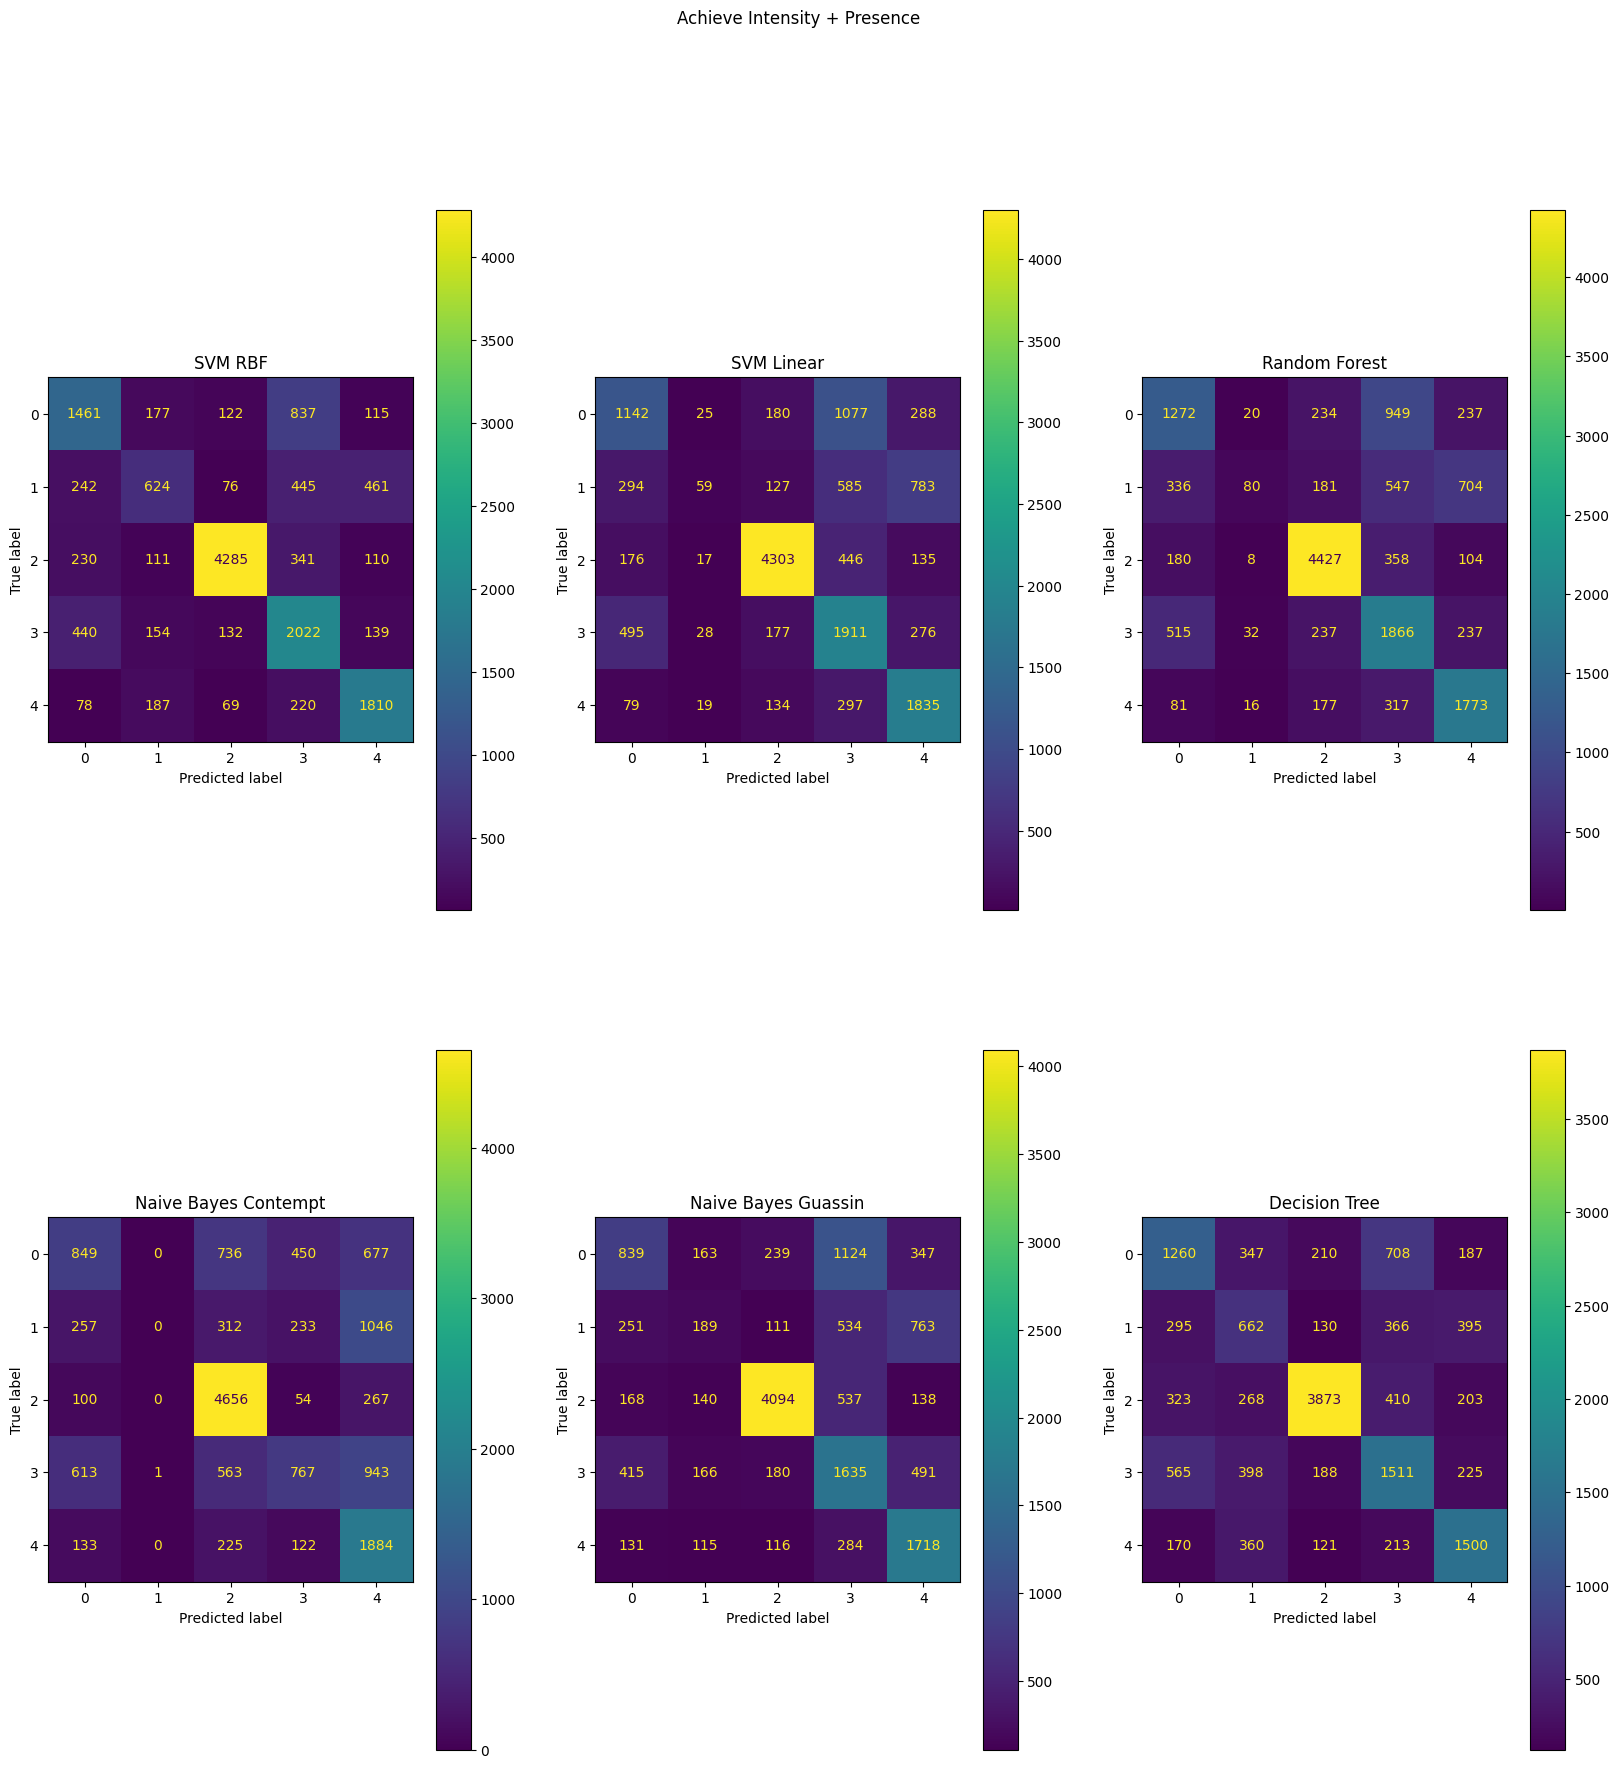

In [147]:
CMplot("Achieve Intensity + Presence", y_test_archieve_ip, svm_y_archieve_ip, svm_linear_y_archieve_ip,
       rf_archieve_ip_y, cnb_archieve_ip_y, gnd_archieve_ip_y, tree_archieve_ip_y)

In [153]:
metics_reports(y_test_archieve_ip, svm_y_archieve_ip)

Accurary Score
0.6852498656636217
F1 Score
0.6338926285514103
Classification Report
              precision    recall  f1-score   support

       Anger       0.60      0.54      0.57      2712
        Fear       0.50      0.34      0.40      1848
       Happy       0.91      0.84      0.88      5077
         Sad       0.52      0.70      0.60      2887
    Surprise       0.69      0.77      0.72      2364

    accuracy                           0.69     14888
   macro avg       0.64      0.64      0.63     14888
weighted avg       0.69      0.69      0.68     14888



In [152]:
metics_reports(y_test_archieve_ip, svm_linear_y_archieve_ip)

Accurary Score
0.6213057495969909
F1 Score
0.5125656884808689
Classification Report
              precision    recall  f1-score   support

       Anger       0.52      0.42      0.47      2712
        Fear       0.40      0.03      0.06      1848
       Happy       0.87      0.85      0.86      5077
         Sad       0.44      0.66      0.53      2887
    Surprise       0.55      0.78      0.65      2364

    accuracy                           0.62     14888
   macro avg       0.56      0.55      0.51     14888
weighted avg       0.62      0.62      0.59     14888



In [151]:
metics_reports(y_test_archieve_ip, rf_archieve_ip_y)

Accurary Score
0.6325900053734551
F1 Score
0.5258561630153722
Classification Report
              precision    recall  f1-score   support

       Anger       0.53      0.47      0.50      2712
        Fear       0.51      0.04      0.08      1848
       Happy       0.84      0.87      0.86      5077
         Sad       0.46      0.65      0.54      2887
    Surprise       0.58      0.75      0.65      2364

    accuracy                           0.63     14888
   macro avg       0.59      0.56      0.53     14888
weighted avg       0.63      0.63      0.60     14888



In [150]:
metics_reports(y_test_archieve_ip, cnb_archieve_ip_y)

Accurary Score
0.5478237506716819
F1 Score
0.40671995877433476
Classification Report
              precision    recall  f1-score   support

       Anger       0.43      0.31      0.36      2712
        Fear       0.00      0.00      0.00      1848
       Happy       0.72      0.92      0.80      5077
         Sad       0.47      0.27      0.34      2887
    Surprise       0.39      0.80      0.52      2364

    accuracy                           0.55     14888
   macro avg       0.40      0.46      0.41     14888
weighted avg       0.48      0.55      0.49     14888



In [149]:
metics_reports(y_test_archieve_ip, gnd_archieve_ip_y)

Accurary Score
0.5692504030091349
F1 Score
0.481440719753349
Classification Report
              precision    recall  f1-score   support

       Anger       0.47      0.31      0.37      2712
        Fear       0.24      0.10      0.14      1848
       Happy       0.86      0.81      0.83      5077
         Sad       0.40      0.57      0.47      2887
    Surprise       0.50      0.73      0.59      2364

    accuracy                           0.57     14888
   macro avg       0.49      0.50      0.48     14888
weighted avg       0.57      0.57      0.55     14888



In [148]:
metics_reports(y_test_archieve_ip, tree_archieve_ip_y)

Accurary Score
0.5914830736163353
F1 Score
0.5464998171640655
Classification Report
              precision    recall  f1-score   support

       Anger       0.48      0.46      0.47      2712
        Fear       0.33      0.36      0.34      1848
       Happy       0.86      0.76      0.81      5077
         Sad       0.47      0.52      0.50      2887
    Surprise       0.60      0.63      0.62      2364

    accuracy                           0.59     14888
   macro avg       0.55      0.55      0.55     14888
weighted avg       0.61      0.59      0.60     14888



### Both Datasets Intensity
- Best Model:
- Worst Model:

ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

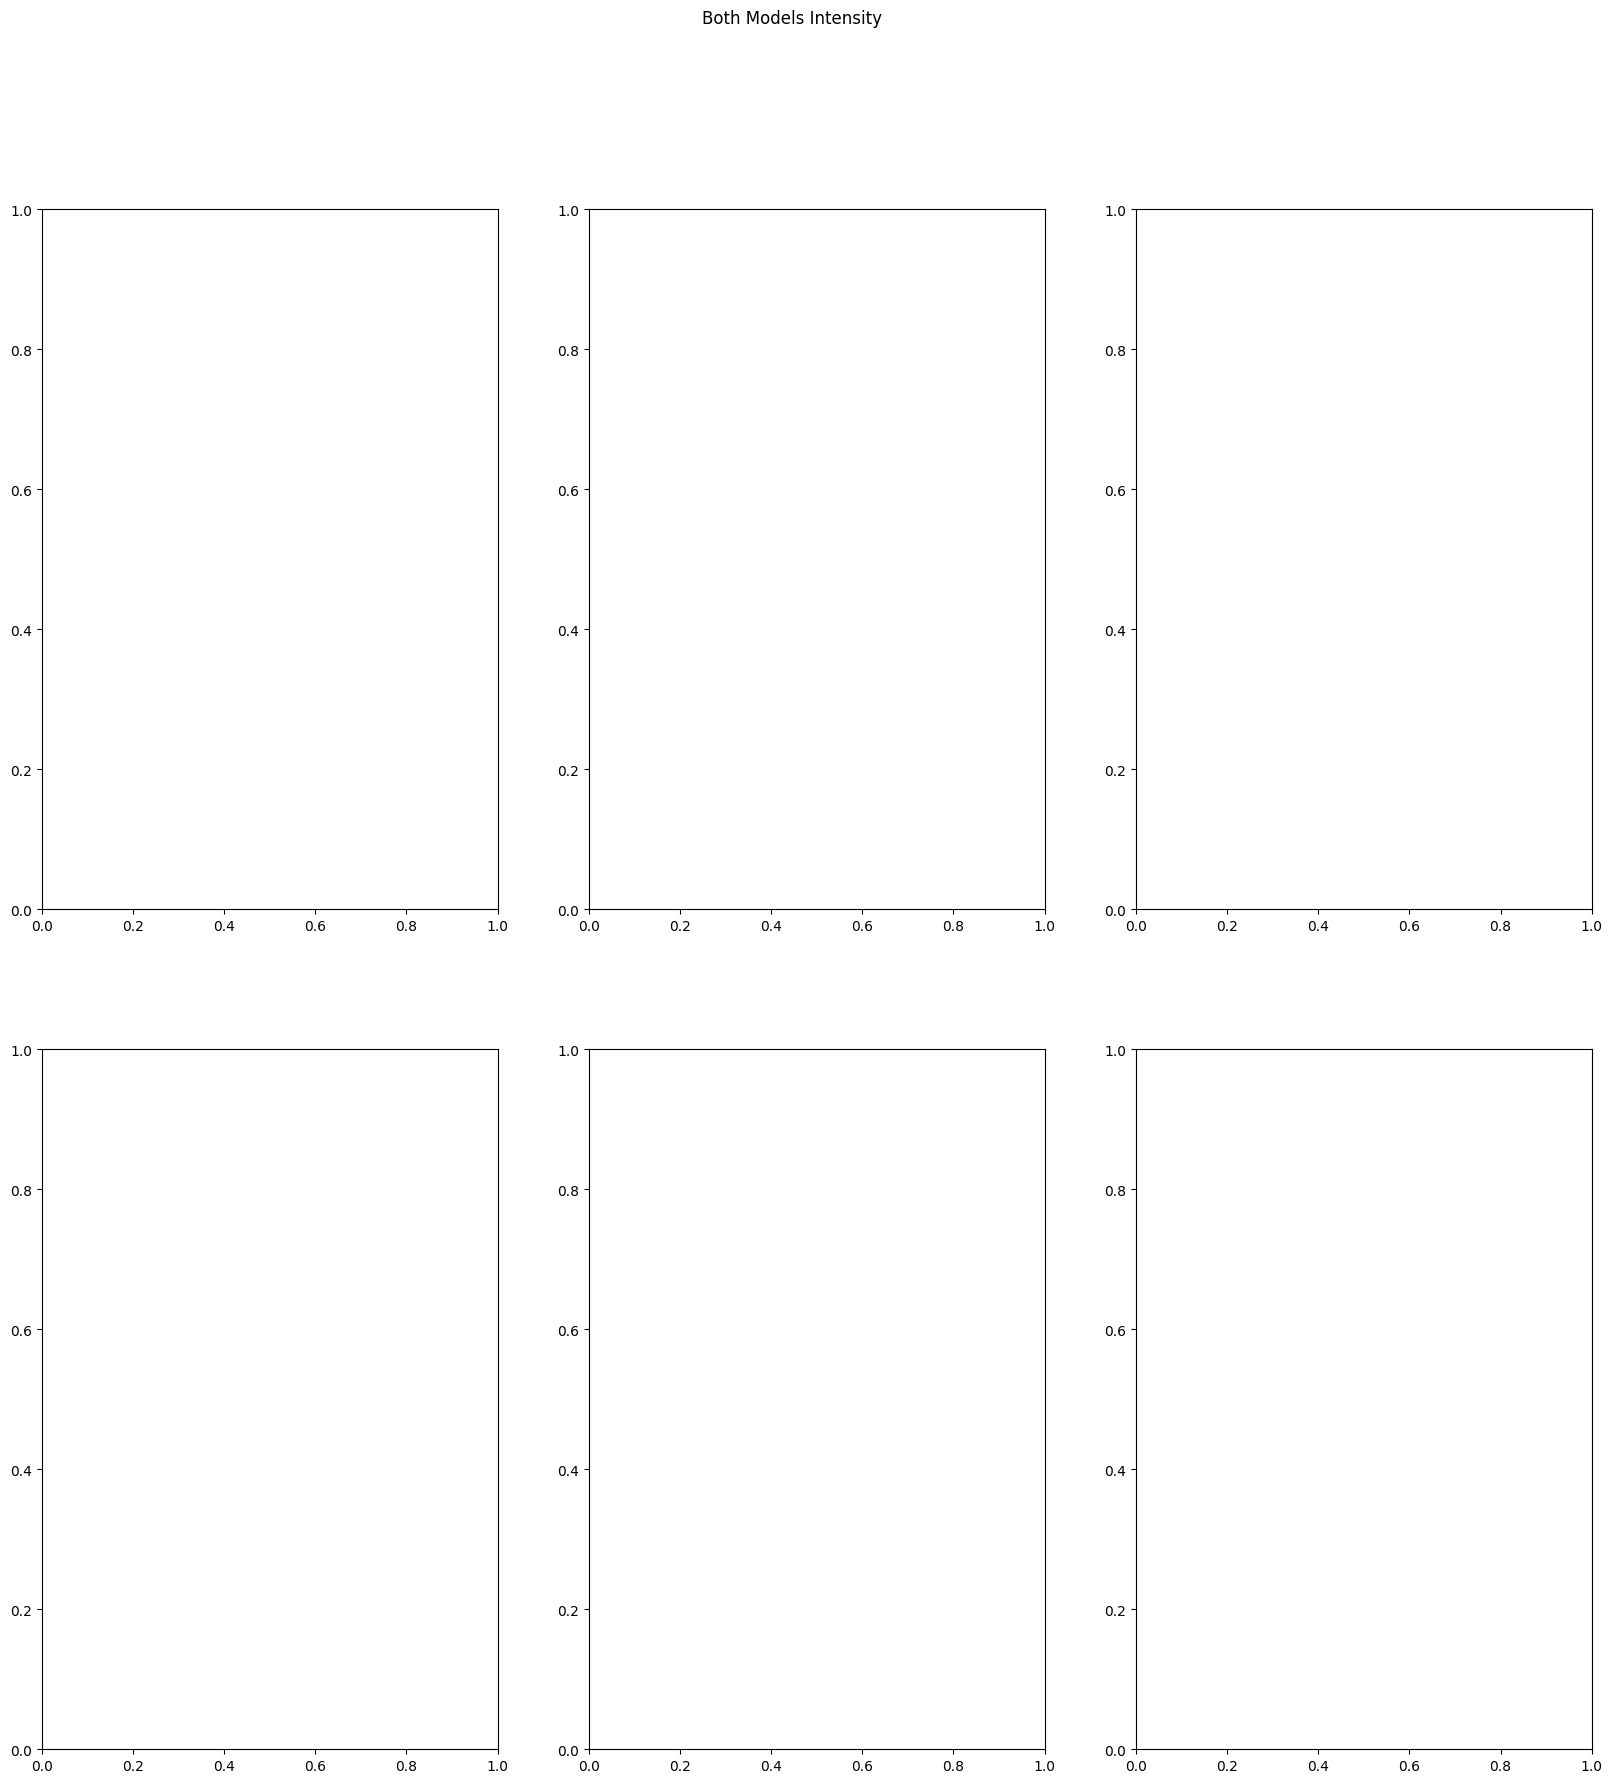

In [154]:
CMplot("Both Models Intensity", y_test_i, svm_y_i, svm_y_l_i,
       rf_i_y, cnb_i_y, gnd_i_y, tree_i_y)

In [157]:
metics_reports(y_test_i, svm_y_i)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

In [161]:
metics_reports(y_test_i, svm_y_l_i)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

In [162]:
metics_reports(y_test_i, rf_i_y)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

In [160]:
metics_reports(y_test_i, cnb_i_y)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

In [159]:
metics_reports(y_test_i, gnd_i_y)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

In [158]:
metics_reports(y_test_i, tree_i_y)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [29776, 14888]

### Both Datasets Presence
- Best Model: TREE
- Worst Model: NB 

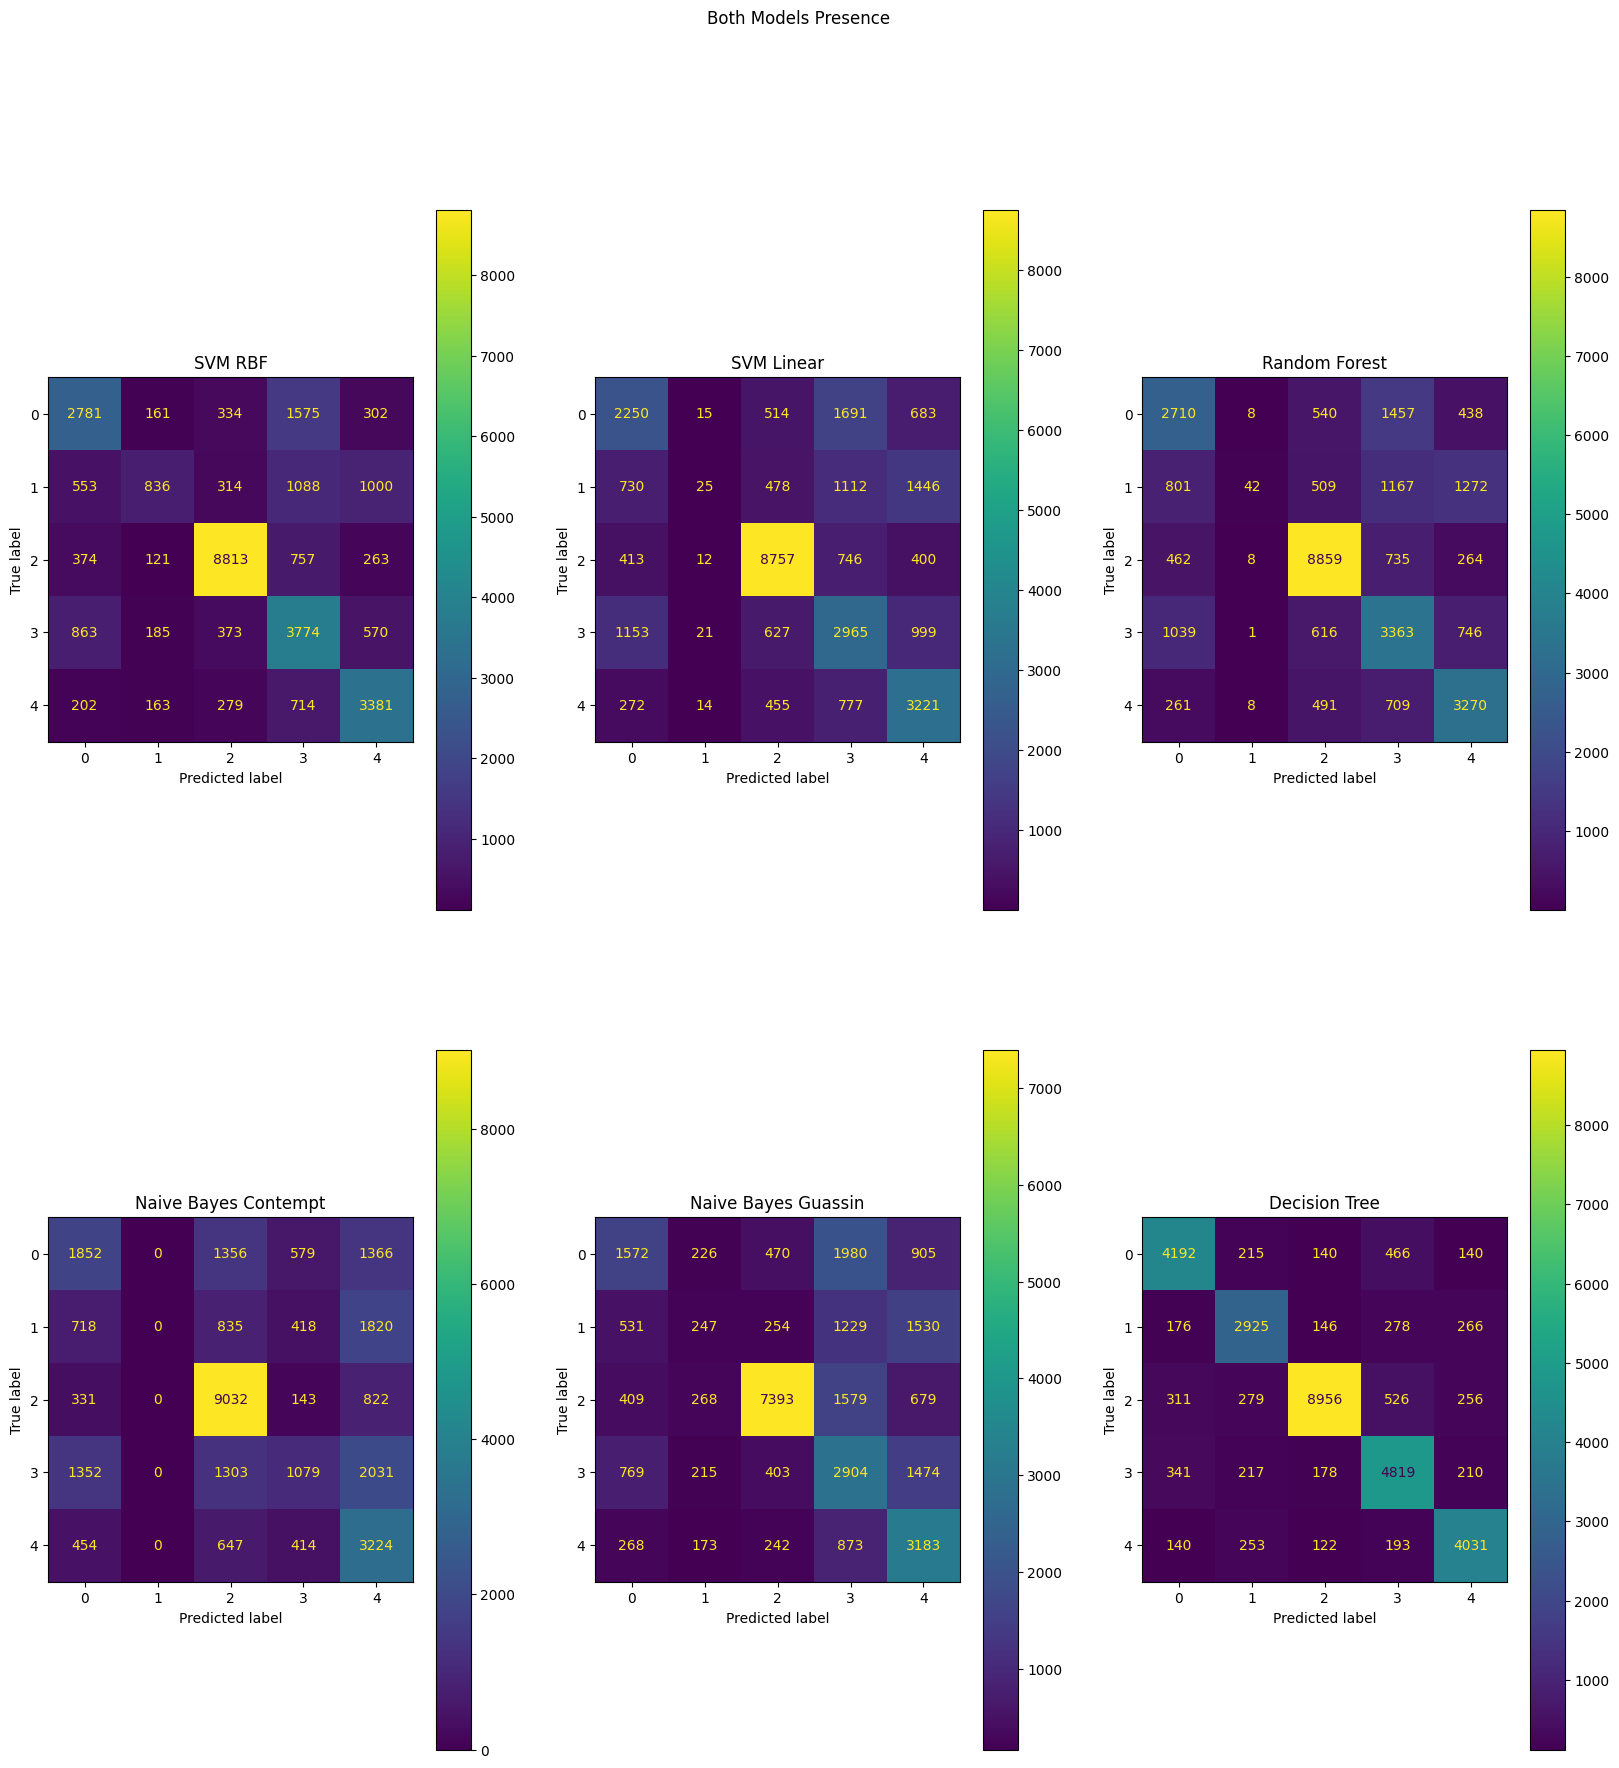

In [163]:
CMplot("Both Models Presence", y_test_p, svm_y_p, svm_y_l_p,
       rf_y_p, cnb_p_y, gnd_p_y, tree_p_y)

In [164]:
metics_reports(y_test_p, svm_y_p)

Accurary Score
0.6577444922084901
F1 Score
0.5904215585893301
Classification Report
              precision    recall  f1-score   support

       Anger       0.58      0.54      0.56      5153
        Fear       0.57      0.22      0.32      3791
       Happy       0.87      0.85      0.86     10328
         Sad       0.48      0.65      0.55      5765
    Surprise       0.61      0.71      0.66      4739

    accuracy                           0.66     29776
   macro avg       0.62      0.60      0.59     29776
weighted avg       0.67      0.66      0.65     29776



In [169]:
metics_reports(y_test_p, svm_y_l_p)

Accurary Score
0.5782509403546481
F1 Score
0.46137825518383935
Classification Report
              precision    recall  f1-score   support

       Anger       0.47      0.44      0.45      5153
        Fear       0.29      0.01      0.01      3791
       Happy       0.81      0.85      0.83     10328
         Sad       0.41      0.51      0.45      5765
    Surprise       0.48      0.68      0.56      4739

    accuracy                           0.58     29776
   macro avg       0.49      0.50      0.46     29776
weighted avg       0.55      0.58      0.54     29776



In [168]:
metics_reports(y_test_p, rf_y_p)

Accurary Score
0.6127082213863514
F1 Score
0.4982090024020203
Classification Report
              precision    recall  f1-score   support

       Anger       0.51      0.53      0.52      5153
        Fear       0.63      0.01      0.02      3791
       Happy       0.80      0.86      0.83     10328
         Sad       0.45      0.58      0.51      5765
    Surprise       0.55      0.69      0.61      4739

    accuracy                           0.61     29776
   macro avg       0.59      0.53      0.50     29776
weighted avg       0.62      0.61      0.58     29776



In [167]:
metics_reports(y_test_p, cnb_p_y)

Accurary Score
0.5100416442772703
F1 Score
0.3723557916329469
Classification Report
              precision    recall  f1-score   support

       Anger       0.39      0.36      0.38      5153
        Fear       0.00      0.00      0.00      3791
       Happy       0.69      0.87      0.77     10328
         Sad       0.41      0.19      0.26      5765
    Surprise       0.35      0.68      0.46      4739

    accuracy                           0.51     29776
   macro avg       0.37      0.42      0.37     29776
weighted avg       0.44      0.51      0.45     29776



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [166]:
metics_reports(y_test_p, gnd_p_y)

Accurary Score
0.513803062869425
F1 Score
0.43008417265718074
Classification Report
              precision    recall  f1-score   support

       Anger       0.44      0.31      0.36      5153
        Fear       0.22      0.07      0.10      3791
       Happy       0.84      0.72      0.77     10328
         Sad       0.34      0.50      0.41      5765
    Surprise       0.41      0.67      0.51      4739

    accuracy                           0.51     29776
   macro avg       0.45      0.45      0.43     29776
weighted avg       0.53      0.51      0.50     29776



In [165]:
metics_reports(y_test_p, tree_p_y)

Accurary Score
0.8370163890381516
F1 Score
0.8224599091223663
Classification Report
              precision    recall  f1-score   support

       Anger       0.81      0.81      0.81      5153
        Fear       0.75      0.77      0.76      3791
       Happy       0.94      0.87      0.90     10328
         Sad       0.77      0.84      0.80      5765
    Surprise       0.82      0.85      0.84      4739

    accuracy                           0.84     29776
   macro avg       0.82      0.83      0.82     29776
weighted avg       0.84      0.84      0.84     29776



### Both Datasets Intensity + Presence
- Best Model: TREE
- Worst Model: CNB

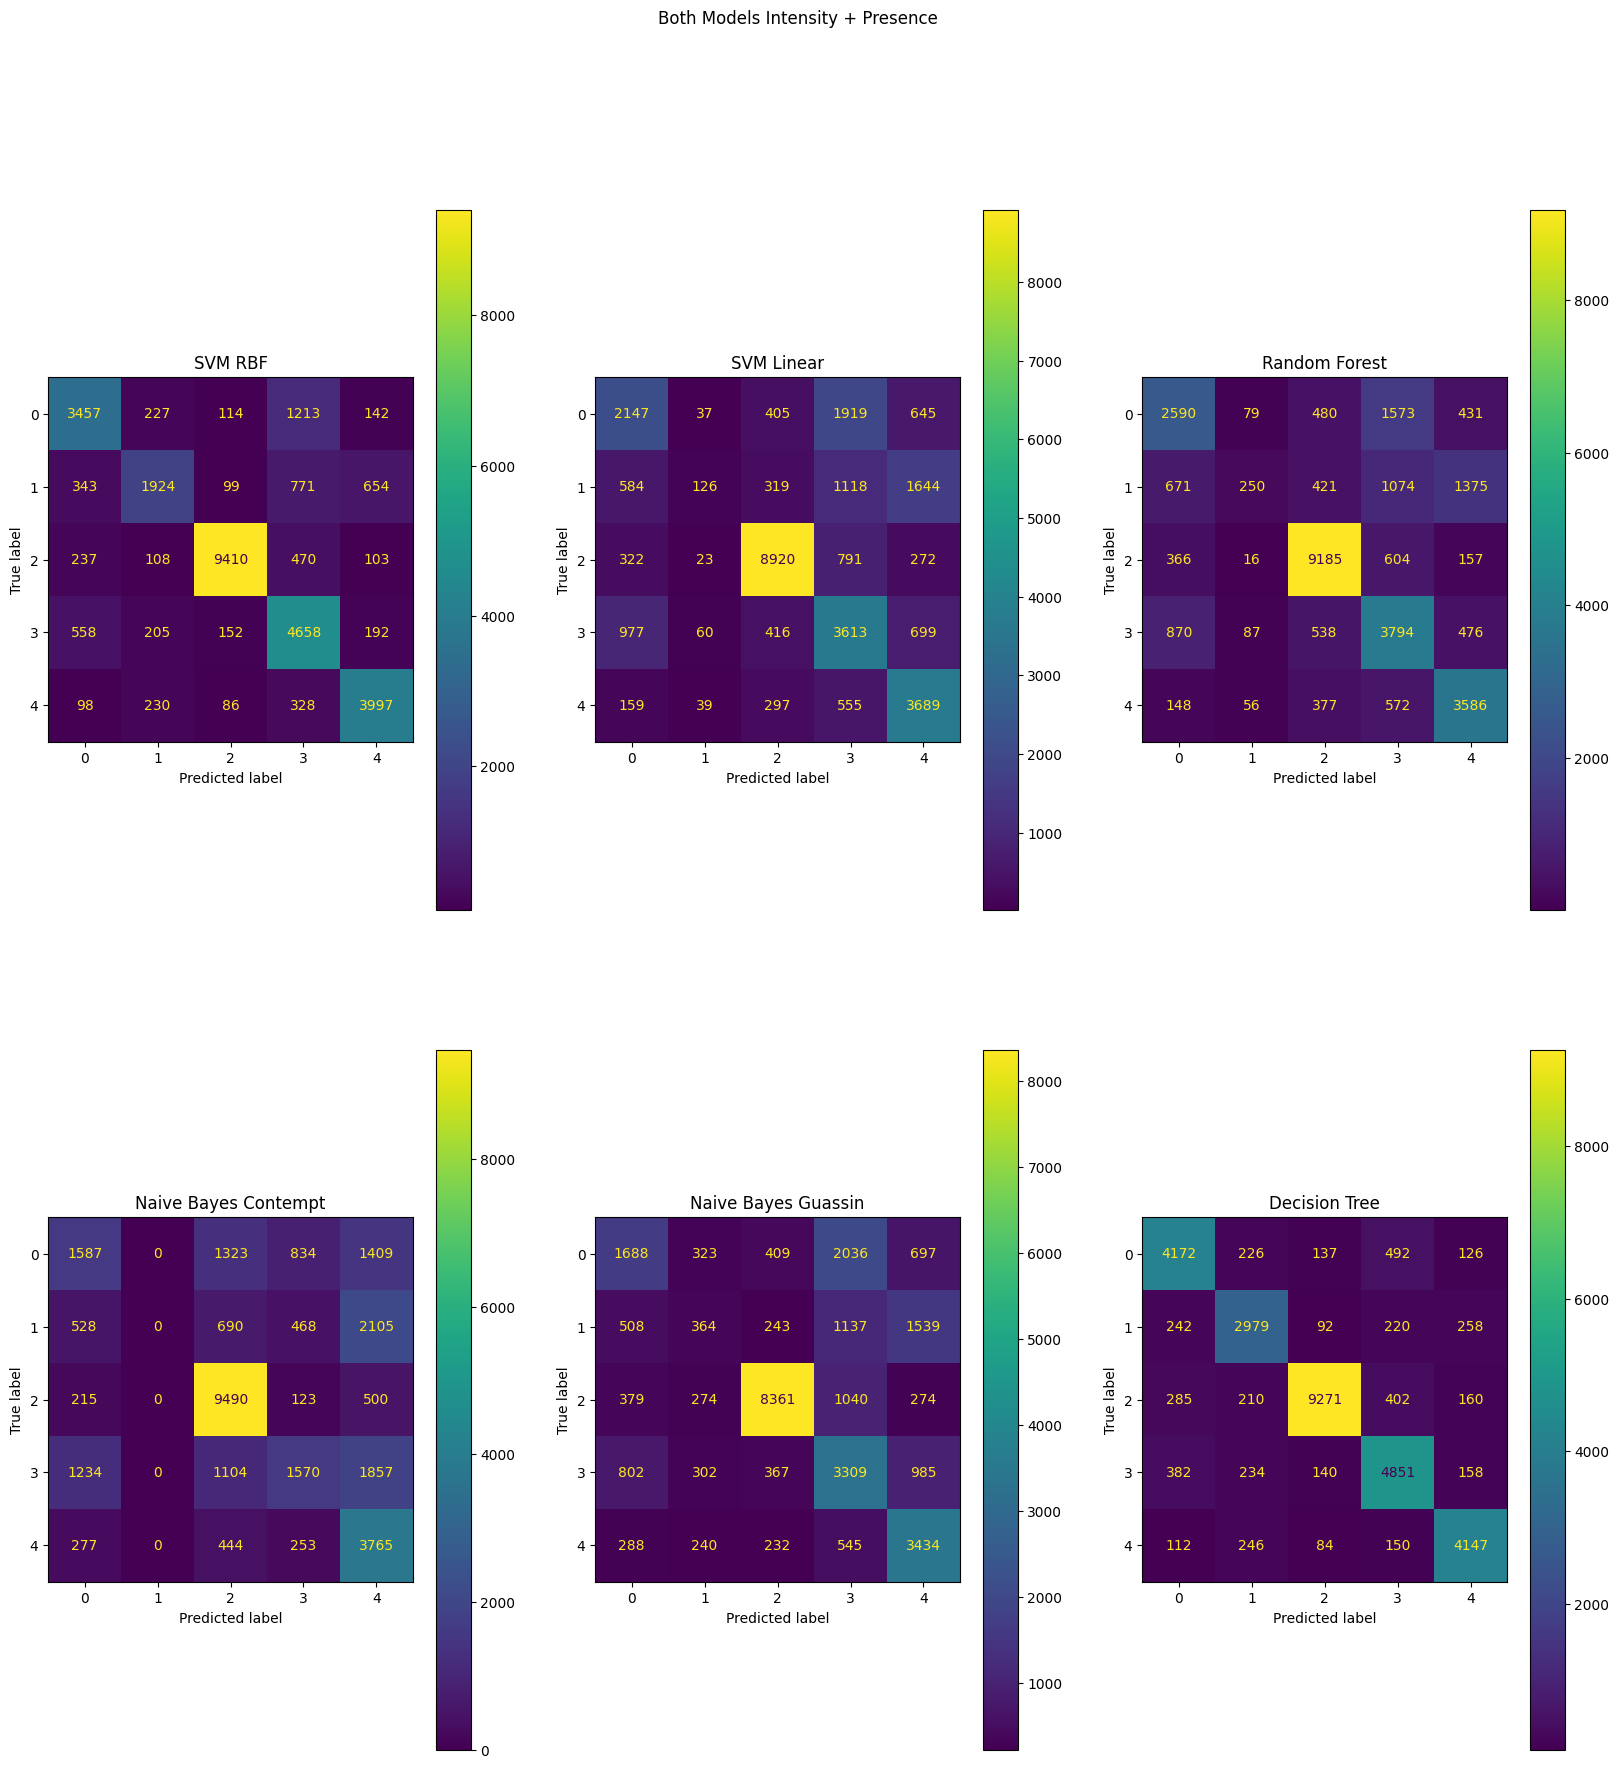

In [170]:
CMplot("Both Models Intensity + Presence", y_test_ip, svm_y_ip, svm_y_linear_ip,
       rf_ip_y, cnb_ip_y, gnd_ip_y, tree_ip_y)

In [176]:
metics_reports(y_test_ip, svm_y_ip)

Accurary Score
0.7874126813541107
F1 Score
0.7493475273581726
Classification Report
              precision    recall  f1-score   support

       Anger       0.74      0.67      0.70      5153
        Fear       0.71      0.51      0.59      3791
       Happy       0.95      0.91      0.93     10328
         Sad       0.63      0.81      0.71      5765
    Surprise       0.79      0.84      0.81      4739

    accuracy                           0.79     29776
   macro avg       0.76      0.75      0.75     29776
weighted avg       0.80      0.79      0.79     29776



In [175]:
metics_reports(y_test_ip, svm_y_linear_ip)

Accurary Score
0.6211378291241269
F1 Score
0.5080567128137388
Classification Report
              precision    recall  f1-score   support

       Anger       0.51      0.42      0.46      5153
        Fear       0.44      0.03      0.06      3791
       Happy       0.86      0.86      0.86     10328
         Sad       0.45      0.63      0.53      5765
    Surprise       0.53      0.78      0.63      4739

    accuracy                           0.62     29776
   macro avg       0.56      0.54      0.51     29776
weighted avg       0.62      0.62      0.59     29776



In [174]:
metics_reports(y_test_ip, rf_ip_y)

Accurary Score
0.6516993551853842
F1 Score
0.5480246291242215
Classification Report
              precision    recall  f1-score   support

       Anger       0.56      0.50      0.53      5153
        Fear       0.51      0.07      0.12      3791
       Happy       0.83      0.89      0.86     10328
         Sad       0.50      0.66      0.57      5765
    Surprise       0.60      0.76      0.67      4739

    accuracy                           0.65     29776
   macro avg       0.60      0.57      0.55     29776
weighted avg       0.64      0.65      0.62     29776



In [173]:
metics_reports(y_test_ip, cnb_ip_y)

Accurary Score
0.5511821601289629
F1 Score
0.4073906743835007
Classification Report
              precision    recall  f1-score   support

       Anger       0.41      0.31      0.35      5153
        Fear       0.00      0.00      0.00      3791
       Happy       0.73      0.92      0.81     10328
         Sad       0.48      0.27      0.35      5765
    Surprise       0.39      0.79      0.52      4739

    accuracy                           0.55     29776
   macro avg       0.40      0.46      0.41     29776
weighted avg       0.48      0.55      0.49     29776



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [172]:
metics_reports(y_test_ip, gnd_ip_y)

Accurary Score
0.5761687264911338
F1 Score
0.48521149352167764
Classification Report
              precision    recall  f1-score   support

       Anger       0.46      0.33      0.38      5153
        Fear       0.24      0.10      0.14      3791
       Happy       0.87      0.81      0.84     10328
         Sad       0.41      0.57      0.48      5765
    Surprise       0.50      0.72      0.59      4739

    accuracy                           0.58     29776
   macro avg       0.50      0.51      0.49     29776
weighted avg       0.57      0.58      0.56     29776



In [171]:
metics_reports(y_test_ip, tree_ip_y)

Accurary Score
0.8537076840408383
F1 Score
0.8376145996765676
Classification Report
              precision    recall  f1-score   support

       Anger       0.80      0.81      0.81      5153
        Fear       0.76      0.79      0.78      3791
       Happy       0.95      0.90      0.92     10328
         Sad       0.79      0.84      0.82      5765
    Surprise       0.86      0.88      0.87      4739

    accuracy                           0.85     29776
   macro avg       0.83      0.84      0.84     29776
weighted avg       0.86      0.85      0.85     29776



## Best Models:
- Fer: Intensity + Presence SVM 68%
- Archieve: Intensity + Presence RF 63%